# Rename folder

In [82]:
import os

def rename_folders_in_directory(parent_directory):
    for folder_name in os.listdir(parent_directory):
        folder_path = os.path.join(parent_directory, folder_name)

        # Check if it's a directory
        if os.path.isdir(folder_path):
            # Split the folder name at the first dot and take the part after it
            new_name = folder_name.split('.', 1)[-1] if '.' in folder_name else folder_name
            new_folder_path = os.path.join(parent_directory, new_name)

            # Rename the folder
            if new_folder_path != folder_path:
                os.rename(folder_path, new_folder_path)
                print(f"Renamed: {folder_path} -> {new_folder_path}")
            else:
                print(f"No renaming needed for: {folder_path}")

# if __name__ == "__main__":
#     parent_directory = os.path.join('..', 'Dataset', 'CUB_KMean_Dataset', 'images')
#     parent_directory = os.path.join('..', 'Dataset', 'CUB_KMean_Dataset', 'unseen_50')
#     rename_folders_in_directory(parent_directory)


# Kmean Process

In [83]:
import os
import numpy as np
import pandas as pd
import cv2
import pickle
import shutil

import csv
from sklearn.cluster import KMeans
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.utils import img_to_array  # Updated import
from keras.models import Model

In [84]:
# Function to load and preprocess images
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, IMG_SIZE)  # Resize image
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)  # Preprocess for VGG16
    return image

In [85]:
def extract_features_from_image():
    
    # Extract features from images
    image_paths, features, class_labels, class_number = [], [], [], []

    for class_folder in os.listdir(image_folder_path):
        class_folder_path = os.path.join(image_folder_path, class_folder)
        # print(class_folder_path, class_folder_path.split('\\')[-1].split('.')[-1].replace('_', ' '))
        print(class_folder_path.split('\\')[-1])
        bird_lable = class_folder_path.split('\\')[-1].split('.')[-1].replace('_', ' ')
        bird_number = class_folder_path.split('\\')[-1].split('.')[0]

        # Ensure it's a directory
        if os.path.isdir(class_folder_path):
            for image_name in os.listdir(class_folder_path):
                image_path = os.path.join(class_folder_path, image_name)
                image_paths.append(image_path)  # Save the image path

                # Load and preprocess image
                image = load_and_preprocess_image(image_path)

                # Extract features
                feature = vgg_model.predict(image)
                features.append(feature.flatten())  # Flatten the feature array
                class_labels.append(bird_lable)
                class_number.append(bird_number)
                
    return (image_paths, features, class_labels, class_number)
    

In [86]:
def save_df(extract_features, CSV_PATH):
    features = np.array(extract_features[1])
    image_paths = np.array(extract_features[0])
    class_number = np.array(extract_features[3])
    class_labels = np.array(extract_features[2])

    df = pd.DataFrame(features)
    df['class_number'] = class_number
    df['class_labels'] = class_labels
    df['image_paths'] = image_paths
    display(df.head())
    
    df.to_csv(CSV_PATH, index=False)
    
    print(f"File saved to : {CSV_PATH}")
    
def train_kmean_model(N_CLUSTERS, features):
    
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters = N_CLUSTERS, random_state = 42)
    # clusters = kmeans.fit_predict(features) 
    # note : she using fit_predict which is wrong in this case need to use fit to train model
    kmeans.fit(features)
    
    return kmeans

# Function to save the model
def save_model(model, file_path):
    
    with open(file_path, 'wb') as f:
        pickle.dump(model, f)
    print(f"Model saved to {file_path}")

# Function to load the model
def load_model(file_path):
    
    with open(file_path, 'rb') as f:
        model = pickle.load(f)
    print(f"Model loaded from {file_path}")
    return model

# Function to predict with the loaded model
def predict(model, data):
    return model.predict(data)

In [87]:
# Path to your image dataset (200 folders)
# IMAGE_DIR = os.path.join('..', 'Dataset', 'CUB_Dataset', 'CUB_Dataset', 'CUB_200_2011', 'images')

IMAGE_DIR = os.path.join('..', 'Dataset', 'CUB_KMean_Dataset', 'og_images')
image_folder_path = IMAGE_DIR

# Parameters
IMG_SIZE = (224, 224)  # Image size for the CNN
N_CLUSTERS = 2 # Number of clusters

# Load pre-trained VGG16 model and remove the top layers
base_model = VGG16(weights='imagenet')
vgg_model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

vgg_model_file_path = os.path.join('..', 'Models', 'vgg_model.pkl')
save_model(vgg_model, vgg_model_file_path)

Model saved to ..\Models\vgg_model.pkl


## I have few querys ? 

1. How can we that much sure about the split ?
2. What if : it not split / cluster properly ? (Need to find out)

## Lest find 

In [88]:
%%time
extract_features = extract_features_from_image()
# print(len(extract_features))

001.Black_footed_Albatross
1/1 [==============================] - 0s 267ms/step
004.Groove_billed_Ani
1/1 [==============================] - 0s 278ms/step
005.Crested_Auklet
1/1 [==============================] - 0s 303ms/step


1/1 [==============================] - 0s 318ms/step
006.Least_Auklet
1/1 [==============================] - 0s 281ms/step
009.Brewer_Blackbird
1/1 [==============================] - 0s 277ms/step
010.Red_winged_Blackbird
1/1 [==============================] - 0s 333ms/step


1/1 [==============================] - 0s 292ms/step
013.Bobolink
1/1 [==============================] - 0s 278ms/step
014.Indigo_Bunting
1/1 [==============================] - 0s 312ms/step
015.Lazuli_Bunting
1/1 [==============================] - 0s 282ms/step


1/1 [==============================] - 0s 277ms/step
017.Cardinal
1/1 [==============================] - 0s 281ms/step
018.Spotted_Catbird
1/1 [==============================] - 0s 280ms/step
020.Yellow_breasted_Chat
1/1 [==============================] - 0s 268ms/step


1/1 [==============================] - 0s 281ms/step
021.Eastern_Towhee
1/1 [==============================] - 0s 274ms/step
022.Chuck_will_Widow
1/1 [==============================] - 0s 277ms/step


1/1 [==============================] - 0s 277ms/step
023.Brandt_Cormorant
1/1 [==============================] - 0s 273ms/step
028.Brown_Creeper
1/1 [==============================] - 0s 282ms/step
029.American_Crow
1/1 [==============================] - 0s 274ms/step


1/1 [==============================] - 0s 322ms/step
030.Fish_Crow
1/1 [==============================] - 0s 281ms/step
031.Black_billed_Cuckoo
1/1 [==============================] - 0s 279ms/step


1/1 [==============================] - 0s 278ms/step
036.Northern_Flicker
1/1 [==============================] - 0s 302ms/step
037.Acadian_Flycatcher
1/1 [==============================] - 0s 287ms/step
038.Great_Crested_Flycatcher
1/1 [==============================] - 0s 278ms/step


1/1 [==============================] - 0s 295ms/step
039.Least_Flycatcher
1/1 [==============================] - 0s 273ms/step
041.Scissor_tailed_Flycatcher
1/1 [==============================] - 0s 265ms/step
044.Frigatebird
1/1 [==============================] - 0s 272ms/step


1/1 [==============================] - 0s 274ms/step
045.Northern_Fulmar
1/1 [==============================] - 0s 284ms/step
046.Gadwall
1/1 [==============================] - 0s 265ms/step


1/1 [==============================] - 0s 278ms/step
049.Boat_tailed_Grackle
1/1 [==============================] - 0s 266ms/step
050.Eared_Grebe
1/1 [==============================] - 0s 499ms/step
051.Horned_Grebe
1/1 [==============================] - 0s 494ms/step


1/1 [==============================] - 0s 479ms/step
054.Blue_Grosbeak
1/1 [==============================] - 0s 314ms/step
055.Evening_Grosbeak
1/1 [==============================] - 0s 454ms/step


1/1 [==============================] - 0s 322ms/step
058.Pigeon_Guillemot
1/1 [==============================] - 0s 259ms/step
059.California_Gull
1/1 [==============================] - 0s 276ms/step
060.Glaucous_winged_Gull
1/1 [==============================] - 0s 476ms/step


1/1 [==============================] - 0s 400ms/step
061.Heermann_Gull
1/1 [==============================] - 0s 456ms/step
062.Herring_Gull
1/1 [==============================] - 0s 479ms/step


1/1 [==============================] - 0s 463ms/step
067.Anna_Hummingbird
1/1 [==============================] - 0s 477ms/step
068.Ruby_throated_Hummingbird
1/1 [==============================] - 0s 470ms/step
070.Green_Violetear
1/1 [==============================] - 0s 472ms/step


1/1 [==============================] - 0s 476ms/step
073.Blue_Jay
1/1 [==============================] - 0s 474ms/step
074.Florida_Jay
1/1 [==============================] - 0s 479ms/step


1/1 [==============================] - 1s 509ms/step
076.Dark_eyed_Junco
1/1 [==============================] - 0s 459ms/step
077.Tropical_Kingbird
1/1 [==============================] - 1s 572ms/step
079.Belted_Kingfisher
1/1 [==============================] - 0s 476ms/step


1/1 [==============================] - 0s 479ms/step
080.Green_Kingfisher
1/1 [==============================] - 0s 483ms/step
084.Red_legged_Kittiwake
1/1 [==============================] - 0s 481ms/step
085.Horned_Lark
1/1 [==============================] - 0s 477ms/step


1/1 [==============================] - 0s 459ms/step
086.Pacific_Loon
1/1 [==============================] - 0s 494ms/step
087.Mallard
1/1 [==============================] - 0s 424ms/step


1/1 [==============================] - 0s 449ms/step
088.Western_Meadowlark
1/1 [==============================] - 0s 451ms/step
091.Mockingbird
1/1 [==============================] - 0s 470ms/step
092.Nighthawk
1/1 [==============================] - 0s 463ms/step


1/1 [==============================] - 0s 424ms/step
093.Clark_Nutcracker
1/1 [==============================] - 0s 394ms/step
095.Baltimore_Oriole
1/1 [==============================] - 0s 404ms/step


1/1 [==============================] - 0s 391ms/step
096.Hooded_Oriole
1/1 [==============================] - 0s 476ms/step
099.Ovenbird
1/1 [==============================] - 0s 476ms/step
100.Brown_Pelican
1/1 [==============================] - 0s 450ms/step


1/1 [==============================] - 0s 443ms/step
101.White_Pelican
1/1 [==============================] - 1s 665ms/step
102.Western_Wood_Pewee
1/1 [==============================] - 0s 401ms/step
103.Sayornis
1/1 [==============================] - 0s 403ms/step


1/1 [==============================] - 0s 403ms/step
104.American_Pipit
1/1 [==============================] - 0s 413ms/step
105.Whip_poor_Will
1/1 [==============================] - 0s 422ms/step


1/1 [==============================] - 0s 416ms/step
106.Horned_Puffin
1/1 [==============================] - 0s 416ms/step
109.American_Redstart
1/1 [==============================] - 0s 414ms/step
110.Geococcyx
1/1 [==============================] - 0s 432ms/step


1/1 [==============================] - 0s 432ms/step
113.Baird_Sparrow
1/1 [==============================] - 0s 460ms/step
114.Black_throated_Sparrow
1/1 [==============================] - 0s 420ms/step
115.Brewer_Sparrow
1/1 [==============================] - 0s 429ms/step


1/1 [==============================] - 0s 483ms/step
116.Chipping_Sparrow
1/1 [==============================] - 0s 456ms/step
117.Clay_colored_Sparrow
1/1 [==============================] - 0s 438ms/step


1/1 [==============================] - 0s 466ms/step
118.House_Sparrow
1/1 [==============================] - 1s 508ms/step
119.Field_Sparrow
1/1 [==============================] - 1s 529ms/step
120.Fox_Sparrow
1/1 [==============================] - 0s 466ms/step


1/1 [==============================] - 0s 470ms/step
121.Grasshopper_Sparrow
1/1 [==============================] - 0s 474ms/step
122.Harris_Sparrow
1/1 [==============================] - 0s 491ms/step


1/1 [==============================] - 0s 443ms/step
123.Henslow_Sparrow
1/1 [==============================] - 0s 467ms/step
134.Cape_Glossy_Starling
1/1 [==============================] - 0s 432ms/step
135.Bank_Swallow
1/1 [==============================] - 0s 417ms/step


1/1 [==============================] - 0s 433ms/step
136.Barn_Swallow
1/1 [==============================] - 1s 512ms/step
139.Scarlet_Tanager
1/1 [==============================] - 0s 445ms/step


1/1 [==============================] - 0s 462ms/step
141.Artic_Tern
1/1 [==============================] - 0s 447ms/step
142.Black_Tern
1/1 [==============================] - 0s 438ms/step
143.Caspian_Tern
1/1 [==============================] - 0s 468ms/step


1/1 [==============================] - 0s 440ms/step
148.Green_tailed_Towhee
1/1 [==============================] - 0s 467ms/step
151.Black_capped_Vireo
1/1 [==============================] - 0s 342ms/step
152.Blue_headed_Vireo
1/1 [==============================] - 0s 311ms/step


1/1 [==============================] - 0s 325ms/step
153.Philadelphia_Vireo
1/1 [==============================] - 0s 333ms/step
158.Bay_breasted_Warbler
1/1 [==============================] - 0s 339ms/step


1/1 [==============================] - 0s 328ms/step
160.Black_throated_Blue_Warbler
1/1 [==============================] - 0s 320ms/step
161.Blue_winged_Warbler
1/1 [==============================] - 1s 553ms/step
162.Canada_Warbler
1/1 [==============================] - 0s 278ms/step


1/1 [==============================] - 0s 271ms/step
164.Cerulean_Warbler
1/1 [==============================] - 0s 377ms/step
167.Hooded_Warbler
1/1 [==============================] - 0s 348ms/step


1/1 [==============================] - 0s 364ms/step
169.Magnolia_Warbler
1/1 [==============================] - 0s 334ms/step
183.Northern_Waterthrush
1/1 [==============================] - 0s 350ms/step
188.Pileated_Woodpecker
1/1 [==============================] - 0s 426ms/step


1/1 [==============================] - 0s 352ms/step
189.Red_bellied_Woodpecker
1/1 [==============================] - 0s 331ms/step
193.Bewick_Wren
1/1 [==============================] - 0s 446ms/step
195.Carolina_Wren
1/1 [==============================] - 0s 398ms/step


1/1 [==============================] - 0s 353ms/step
200.Common_Yellowthroat
1/1 [==============================] - 0s 284ms/step
CPU times: total: 2h 7min 59s
Wall time: 59min 8s


### Note for future : 
1. we can use standard scalar or min-max scalar before kmean cluster 
2. we can use PCA for dimentionality reduction

In [89]:
%%time
# Save dataframe
CSV_PATH = os.path.join('..', 'Dataset', 'images_extract_features.csv')
save_df(extract_features, CSV_PATH)

,0,1,2,3,4,5,6,7,8,9,...,4089,4090,4091,4092,4093,4094,4095,class_number,class_labels,image_paths
0,3.042403,2.884922,0.000000,7.585155,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,001,Black footed Albatross,..\Dataset\CUB_KMean_Dataset\og_images\001.Bla...
1,0.000000,0.000000,9.547824,5.867018,0.0,0.0,0.0,0.0,0.547732,0.614757,...,0.000000,0.0,0.0,13.213732,0.000000,0.0,0.0,001,Black footed Albatross,..\Dataset\CUB_KMean_Dataset\og_images\001.Bla...
2,4.043432,0.000000,0.000000,1.765985,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,001,Black footed Albatross,..\Dataset\CUB_KMean_Dataset\og_images\001.Bla...
3,0.000000,0.643451,0.000000,11.106439,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,3.763441,2.361611,0.0,0.0,001,Black footed Albatross,..\Dataset\CUB_KMean_Dataset\og_images\001.Bla...
4,4.628634,3.541798,0.000000,2.993902,0.0,0.0,0.0,0.0,0.000000,0.000000,...,6.767929,0.0,0.0,1.820253,0.000000,0.0,0.0,001,Black footed Albatross,..\Dataset\CUB_KMean_Dataset\og_images\001.Bla...


File saved to : ..\Dataset\images_extract_features.csv
CPU times: total: 17.4 s
Wall time: 18.3 s


In [90]:
# Convert features to numpy array
features = np.array(extract_features[1])

# Train Kmean model
clusters = train_kmean_model(N_CLUSTERS, features)
print(clusters)

# Save the model
file_path = os.path.join('..', 'Models', 'kmean_model.pkl')
save_model(clusters, file_path)

# Load the model
clusters = load_model(file_path)

# Predict with the loaded model
y_pred_clusters = predict(clusters, features)
print(y_pred_clusters)

C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)
Model saved to ..\Models\kmean_model.pkl
Model loaded from ..\Models\kmean_model.pkl
[0 0 0 ... 0 1 1]


In [91]:
CSV_PATH = os.path.join('..', 'Dataset', 'images_extract_features.csv')
df = pd.read_csv(CSV_PATH)
df['y_pred_clusters'] = y_pred_clusters
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4090,4091,4092,4093,4094,4095,class_number,class_labels,image_paths,y_pred_clusters
0,3.042403,2.884922,0.000000,7.585155,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,1,Black footed Albatross,..\Dataset\CUB_KMean_Dataset\og_images\001.Bla...,0
1,0.000000,0.000000,9.547824,5.867018,0.0,0.0,0.0,0.0,0.547732,0.614757,...,0.0,0.0,13.213732,0.000000,0.0,0.0,1,Black footed Albatross,..\Dataset\CUB_KMean_Dataset\og_images\001.Bla...,0
2,4.043432,0.000000,0.000000,1.765985,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,1,Black footed Albatross,..\Dataset\CUB_KMean_Dataset\og_images\001.Bla...,0
3,0.000000,0.643451,0.000000,11.106439,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,3.763441,2.361611,0.0,0.0,1,Black footed Albatross,..\Dataset\CUB_KMean_Dataset\og_images\001.Bla...,0
4,4.628635,3.541798,0.000000,2.993902,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,1.820253,0.000000,0.0,0.0,1,Black footed Albatross,..\Dataset\CUB_KMean_Dataset\og_images\001.Bla...,0


In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(35,8))

# sns.barplot(df, x="y_pred_clusters", y="class_number", hue="class_number")

<Figure size 3500x800 with 0 Axes>

<Figure size 3500x800 with 0 Axes>

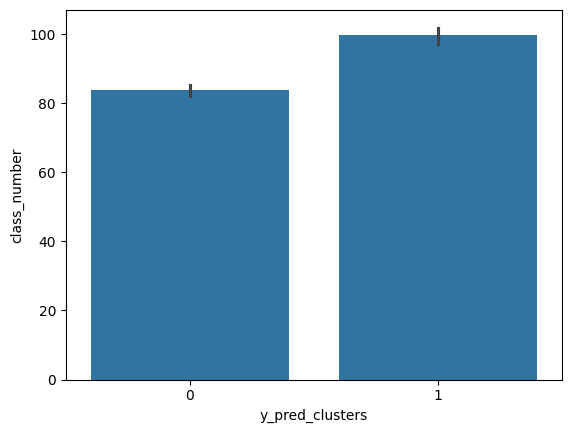

In [98]:
sns.barplot(df, x="y_pred_clusters", y="class_number") # , hue="class_number"
plt.show()

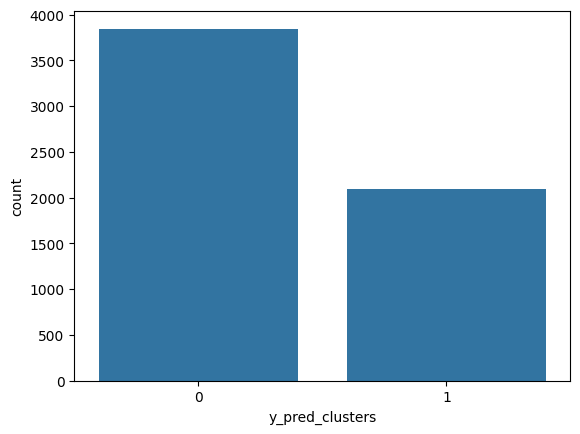

In [99]:
sns.countplot(x='y_pred_clusters', data=df)
plt.show()

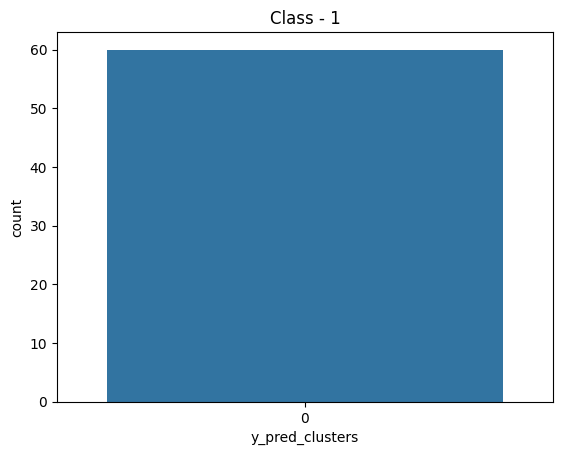

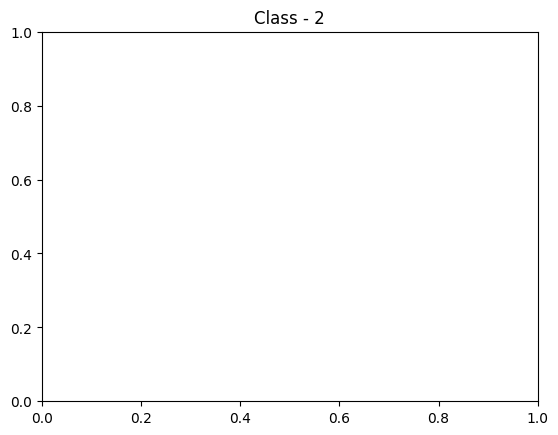

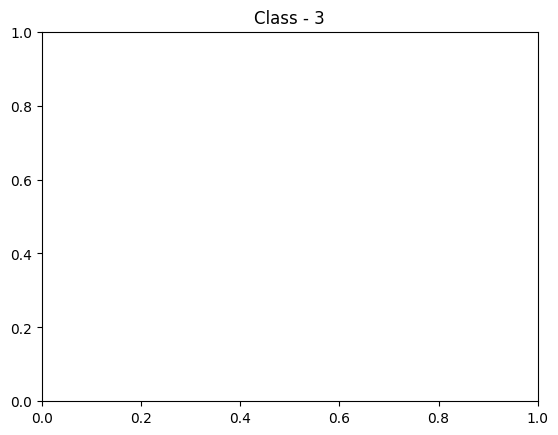

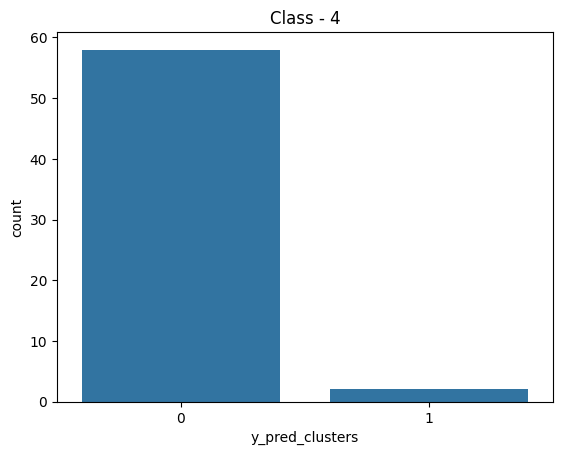

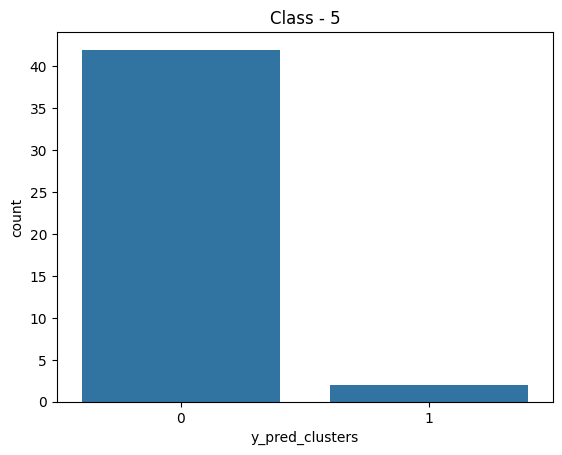

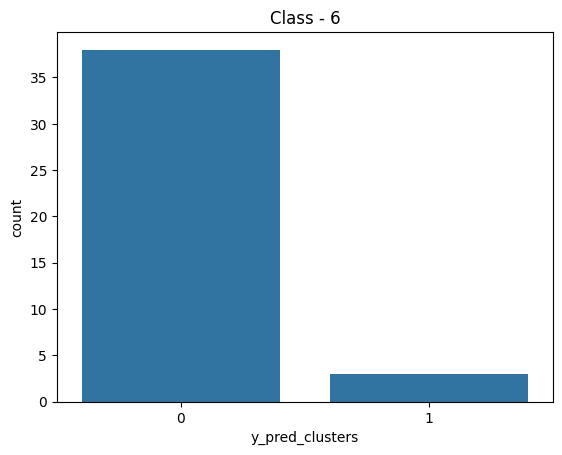

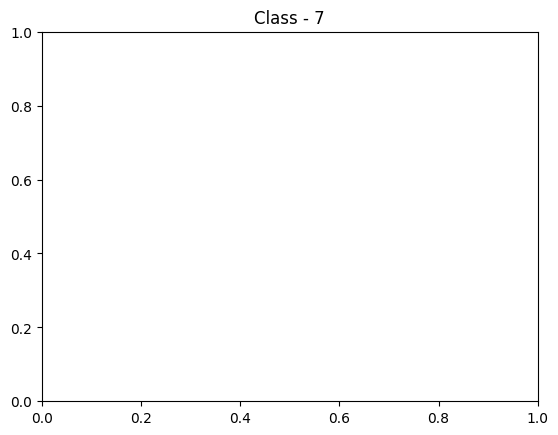

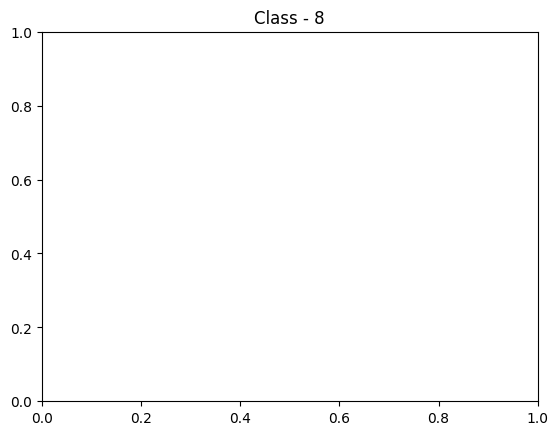

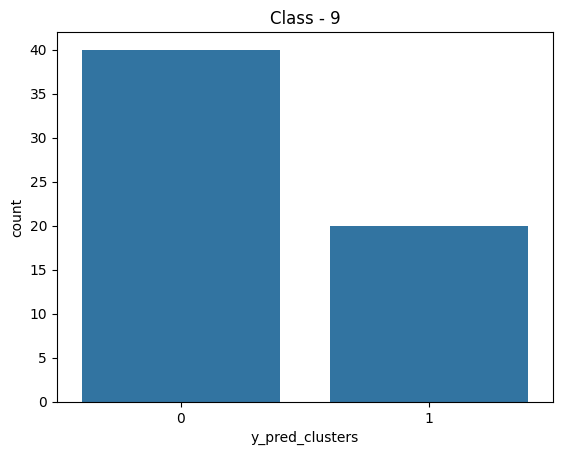

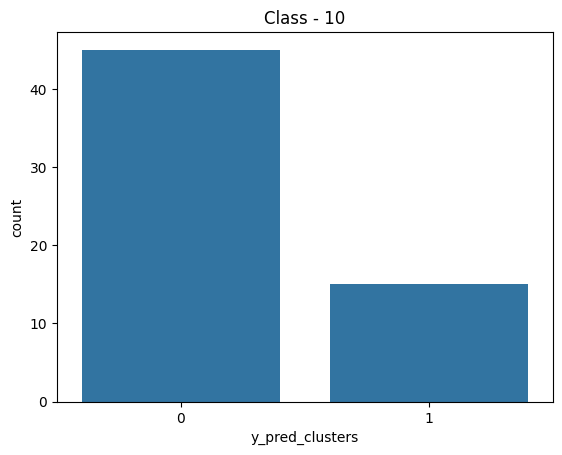

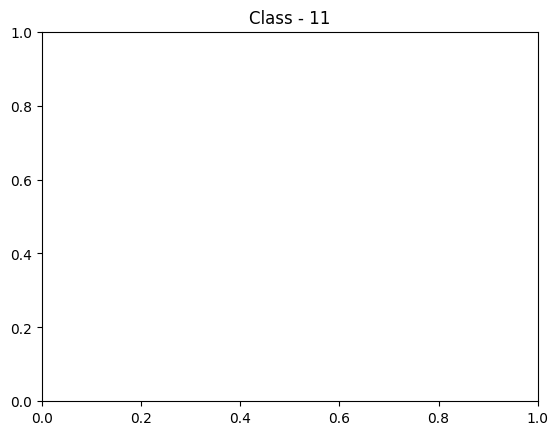

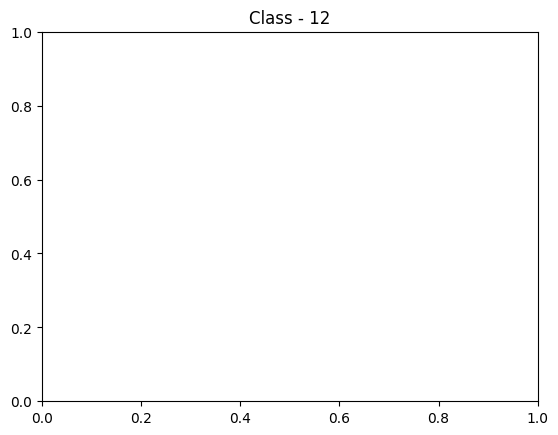

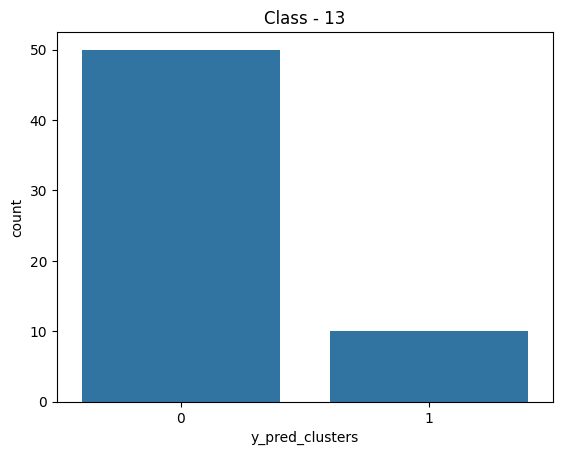

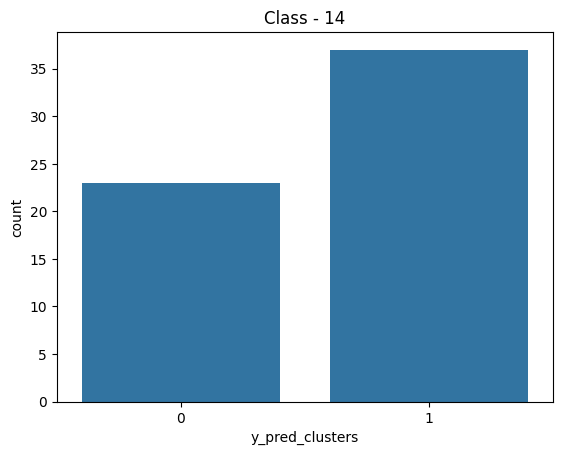

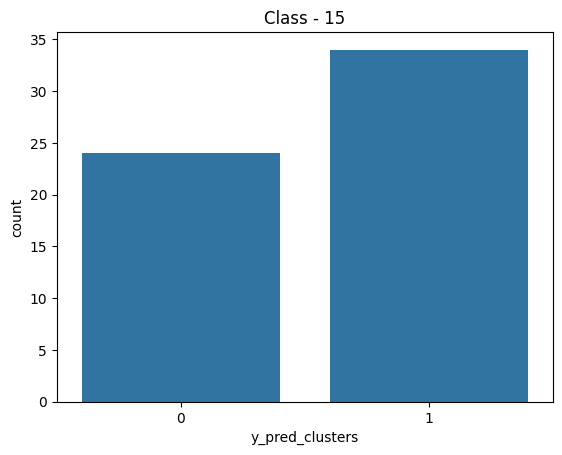

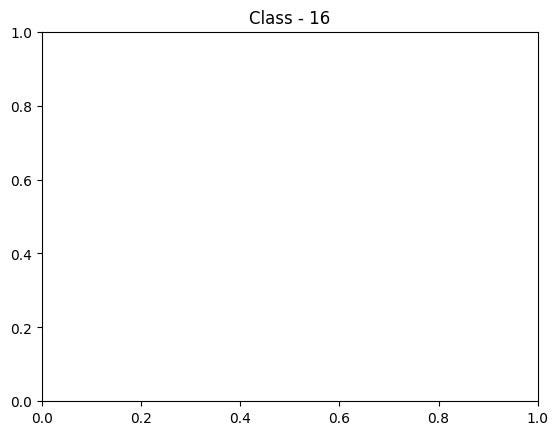

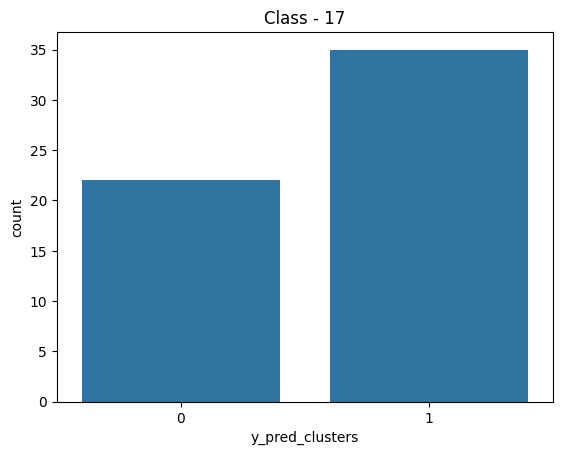

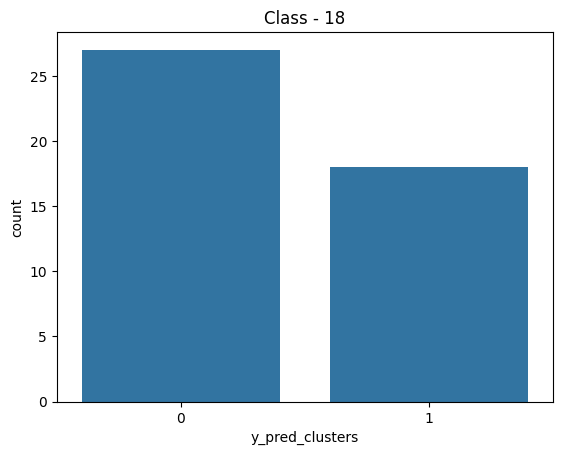

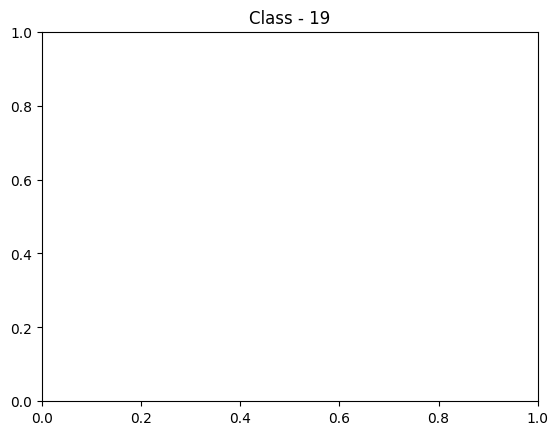

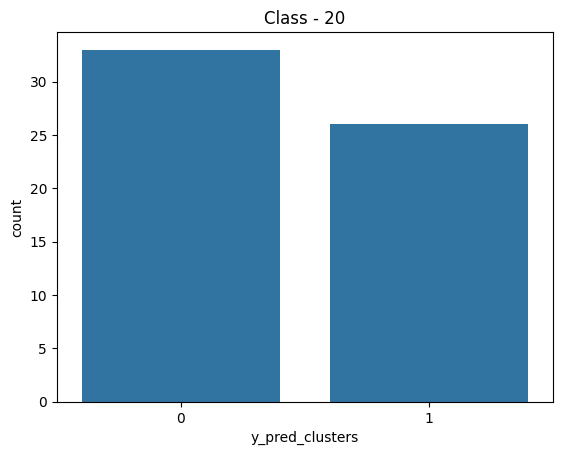

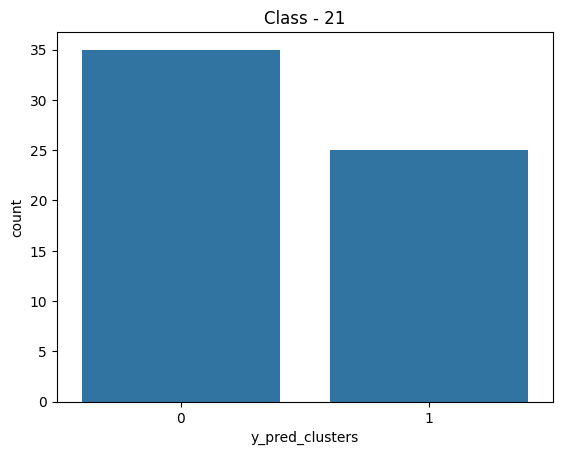

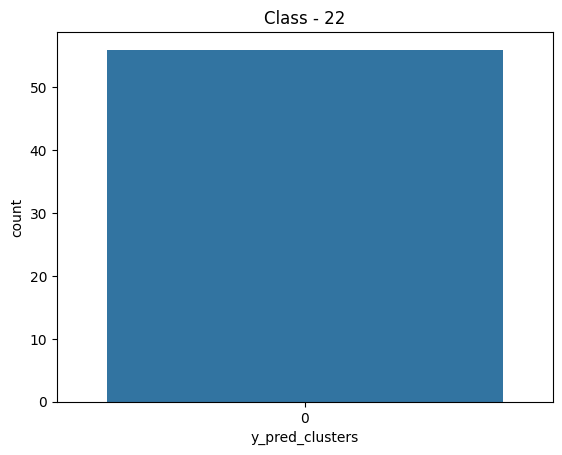

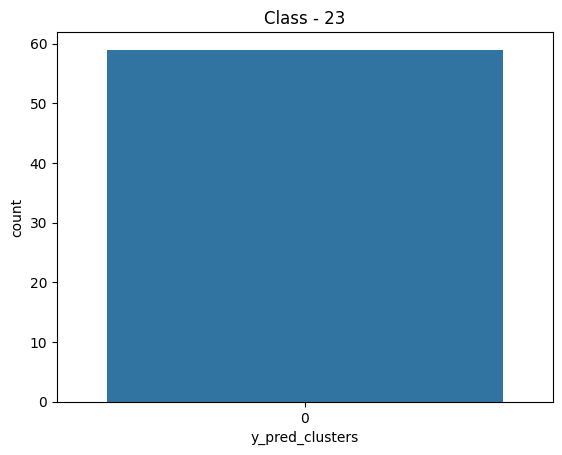

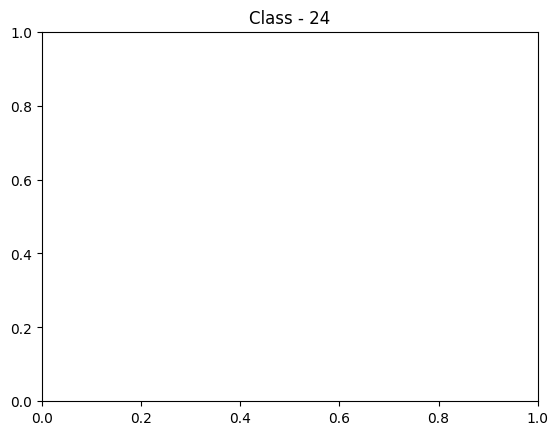

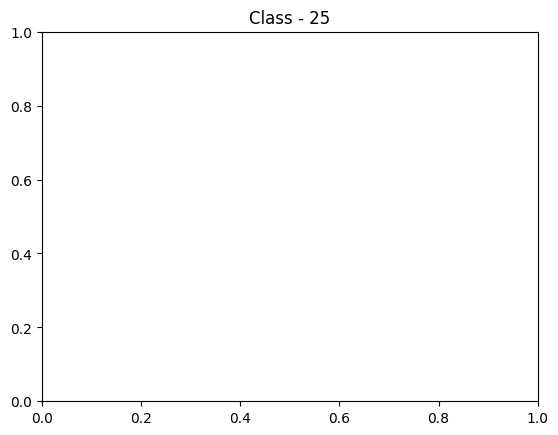

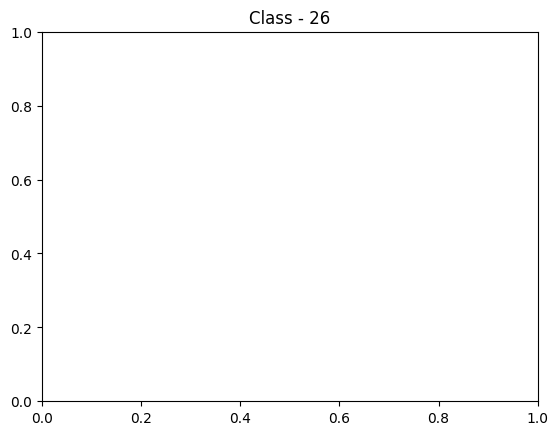

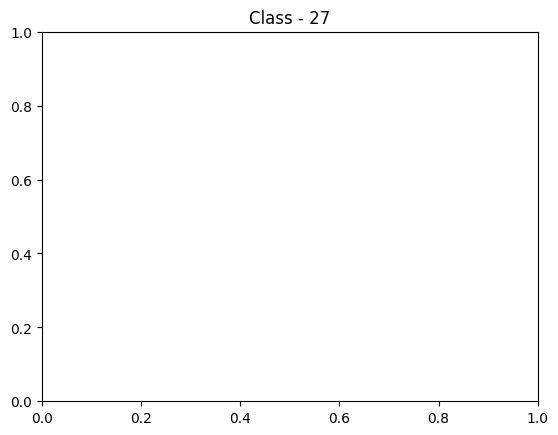

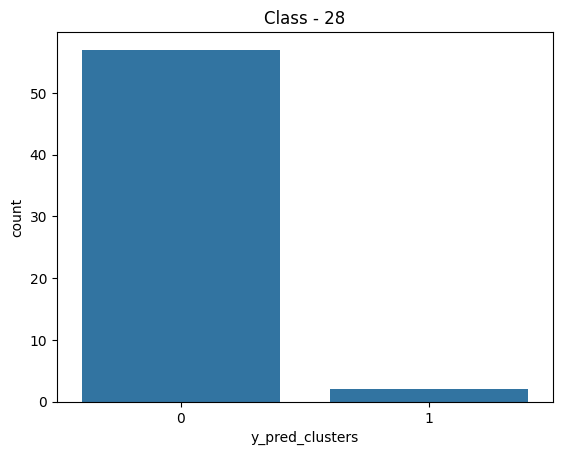

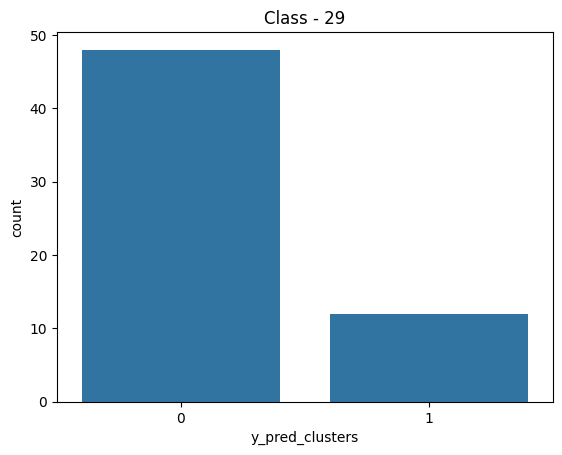

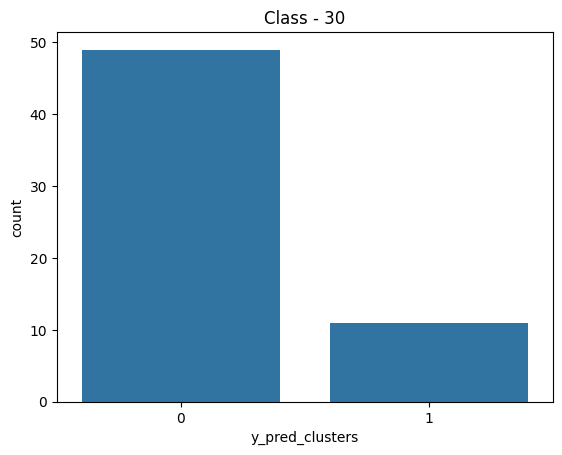

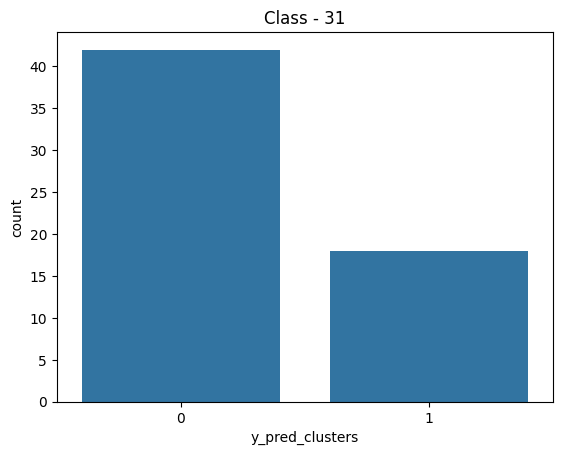

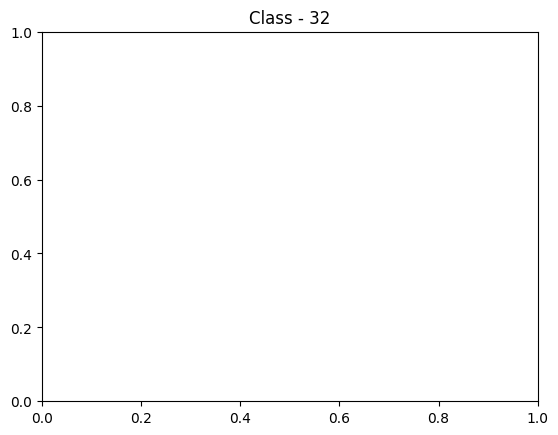

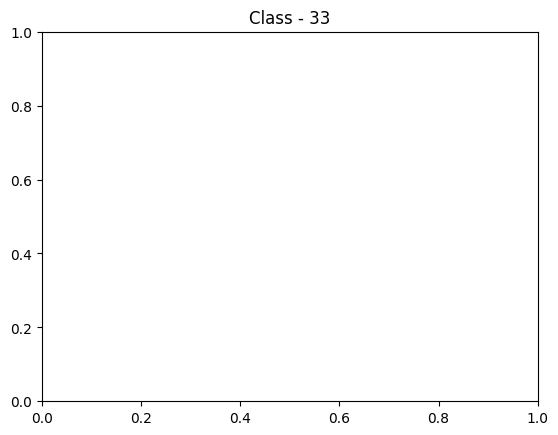

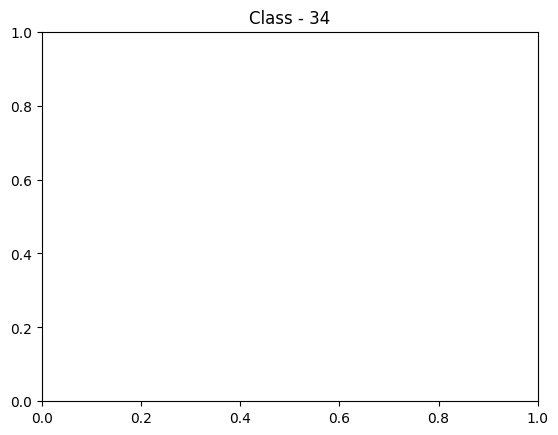

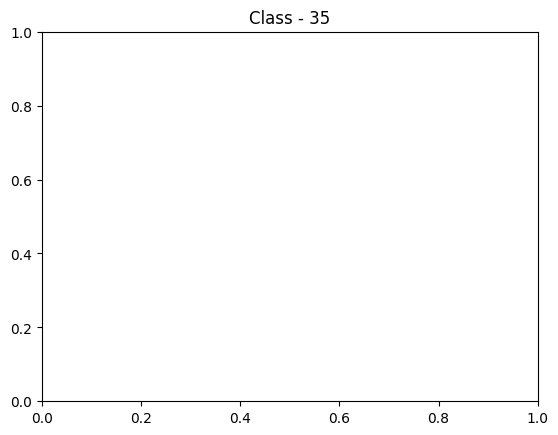

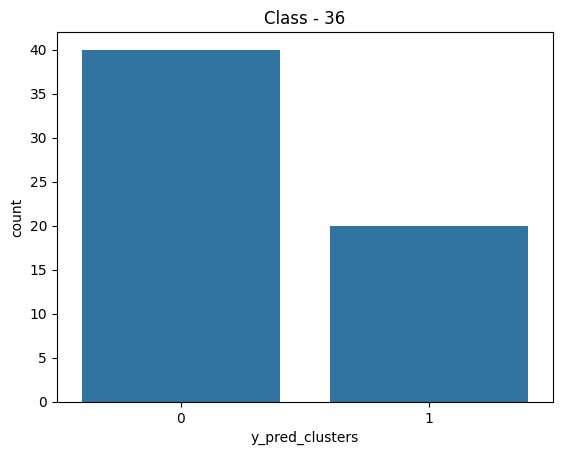

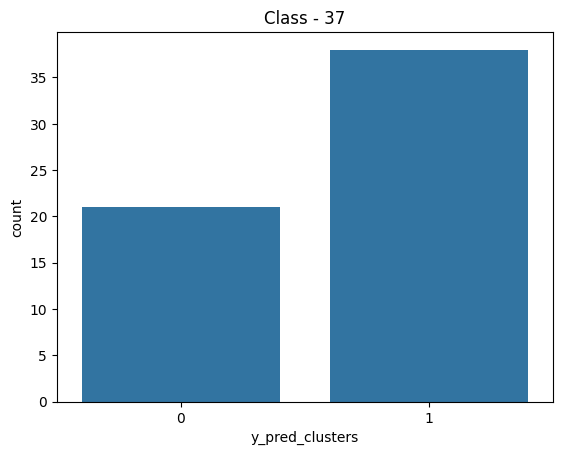

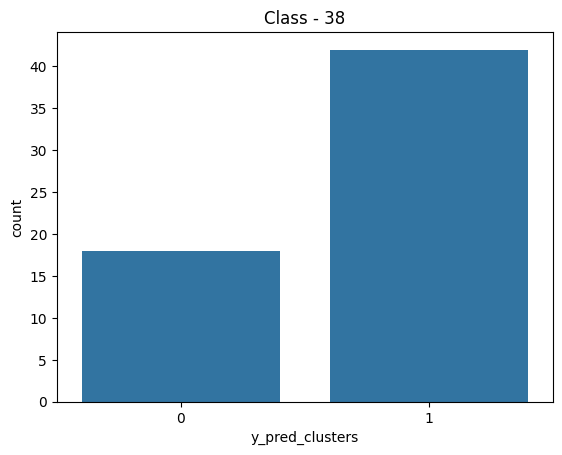

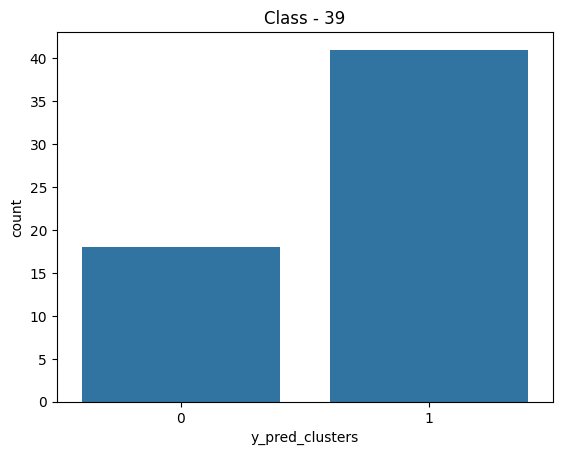

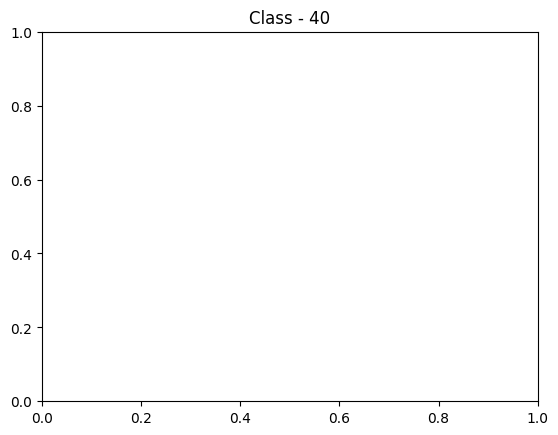

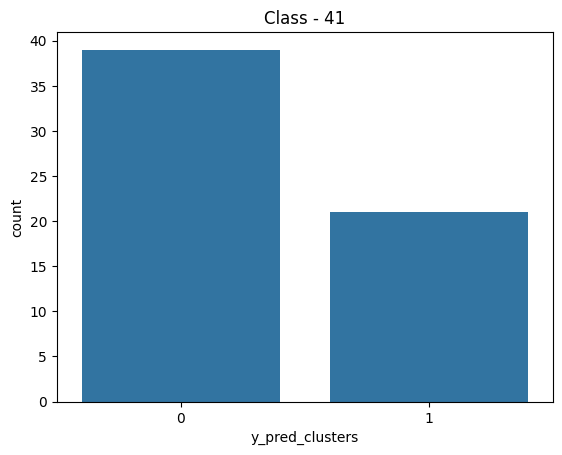

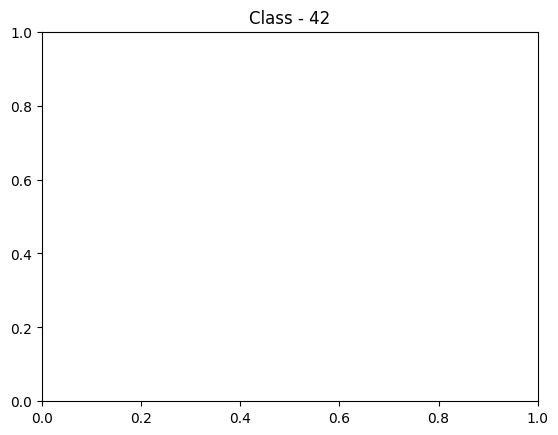

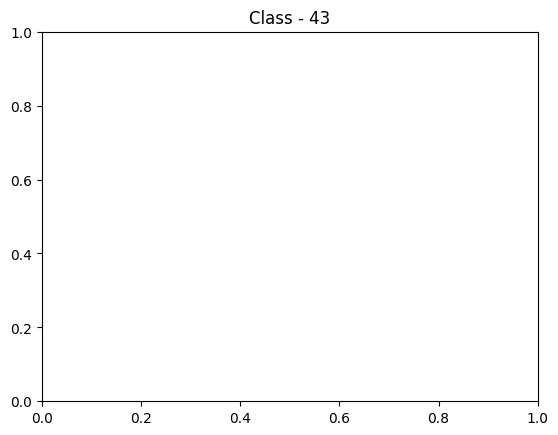

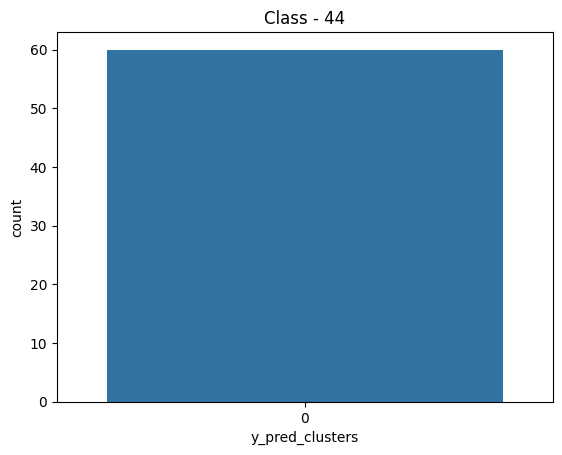

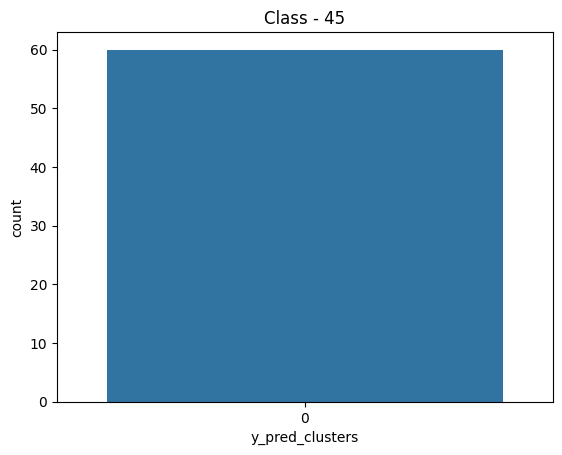

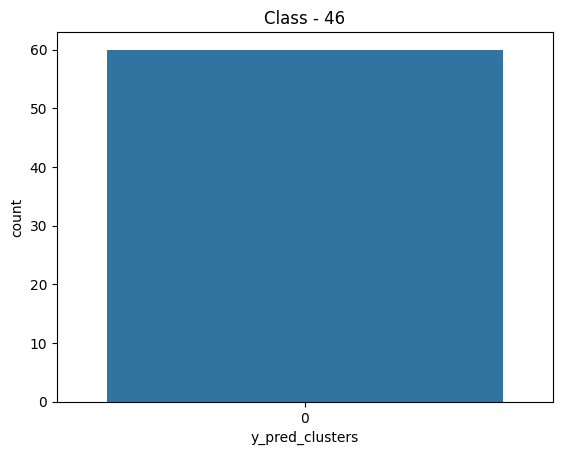

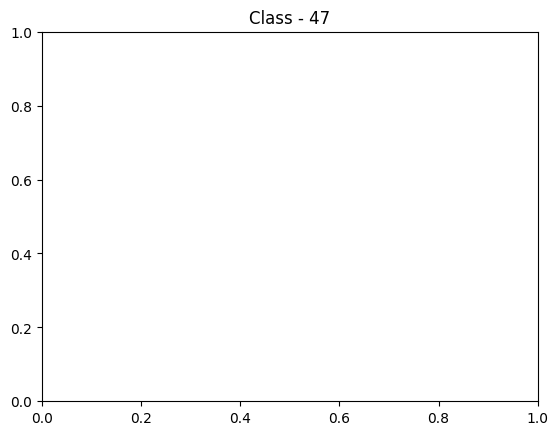

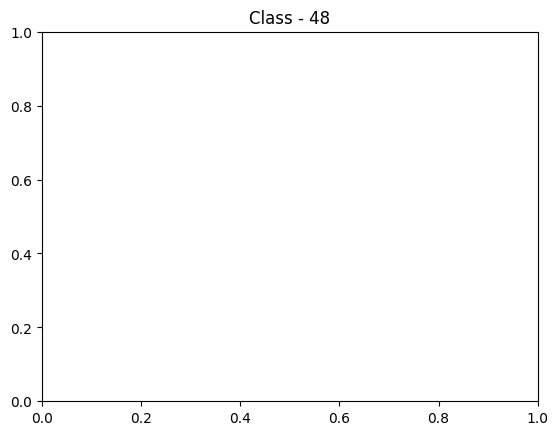

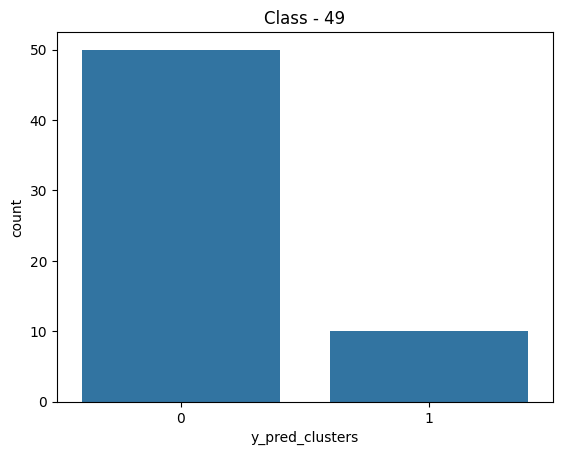

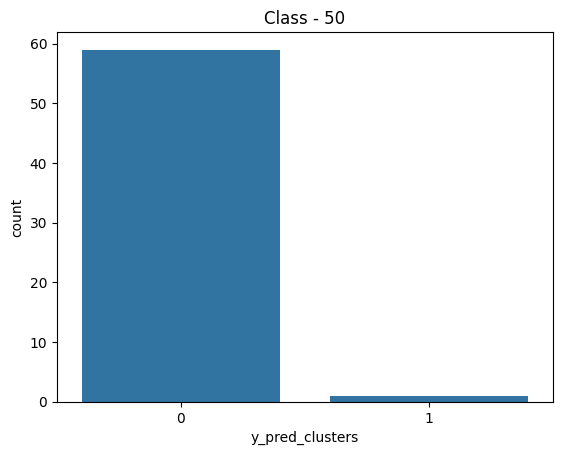

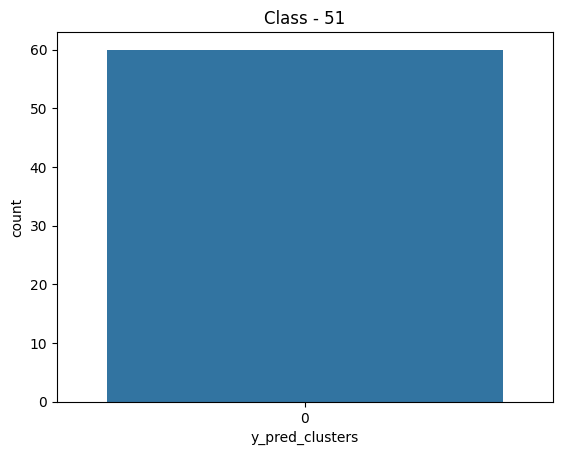

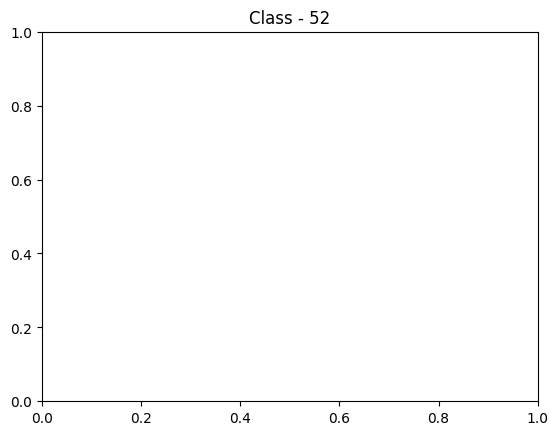

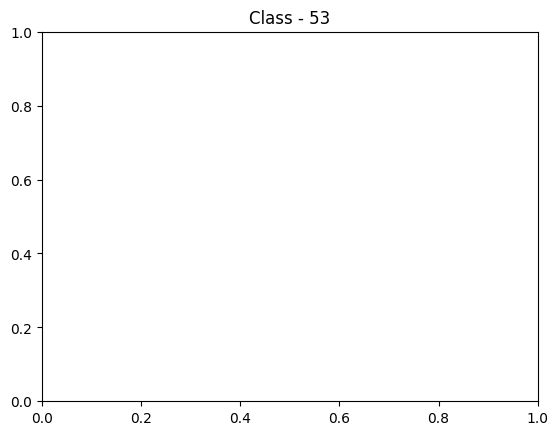

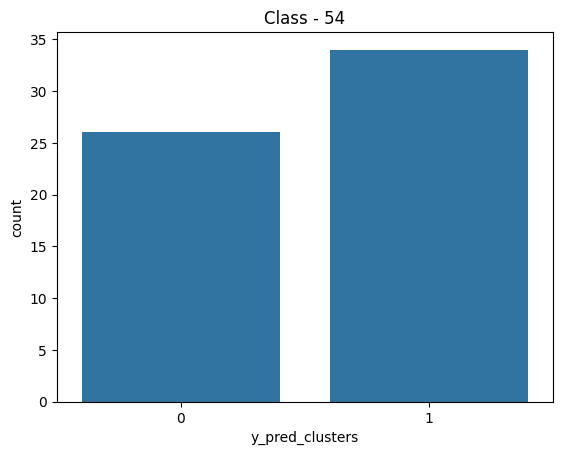

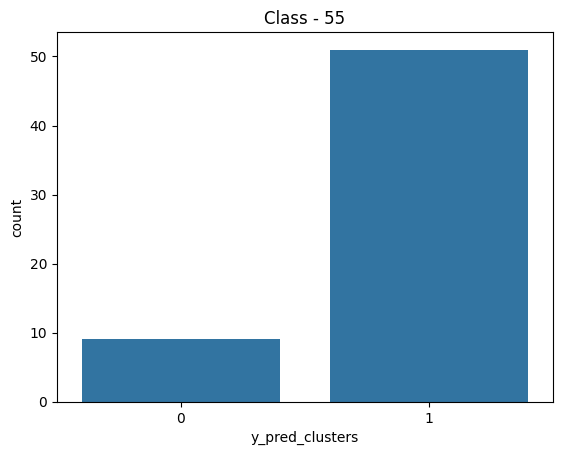

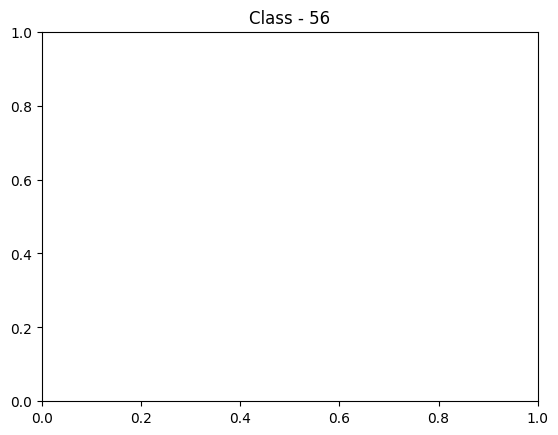

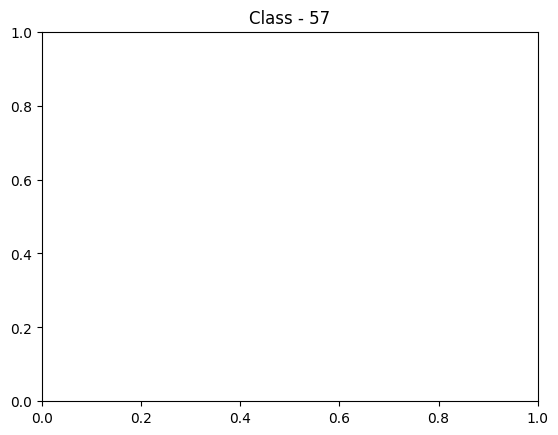

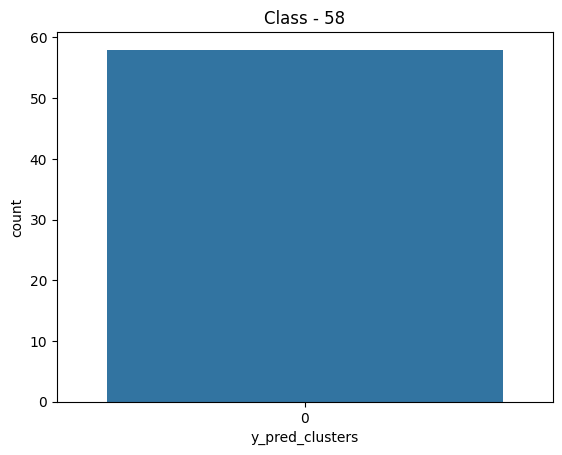

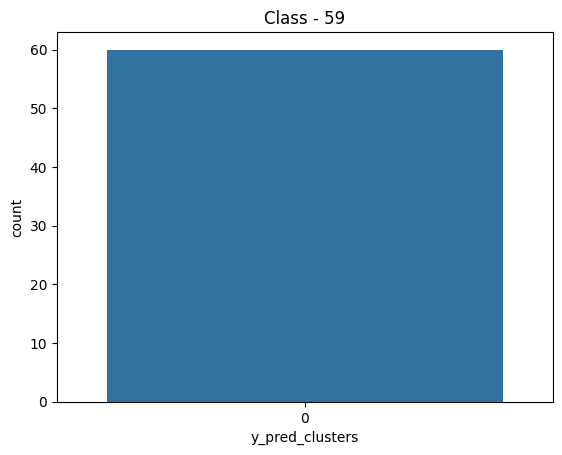

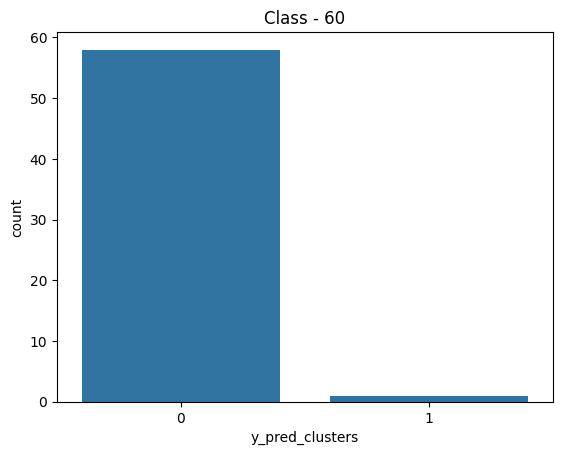

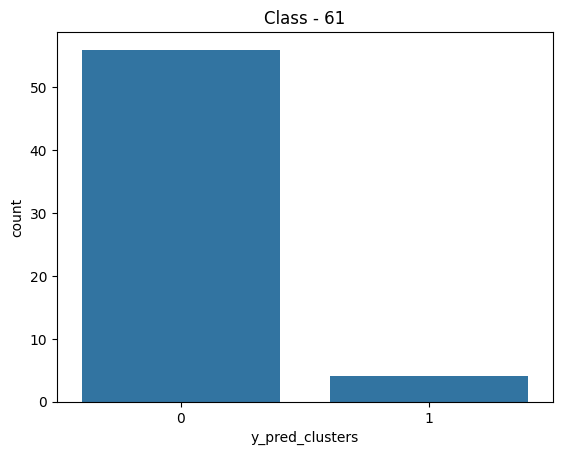

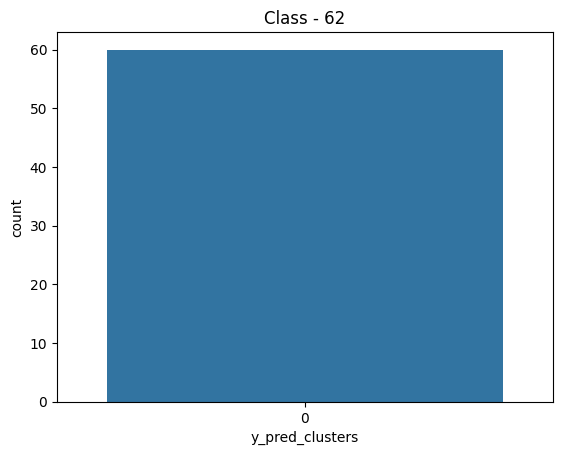

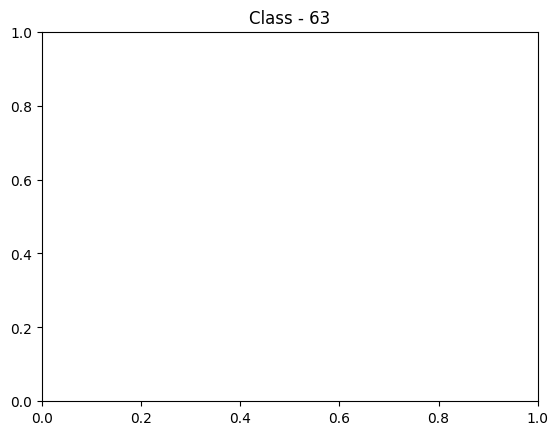

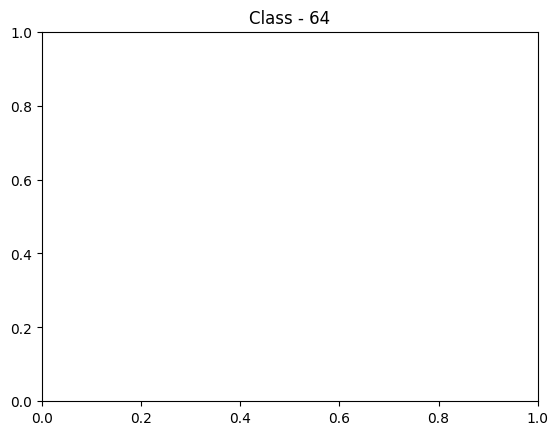

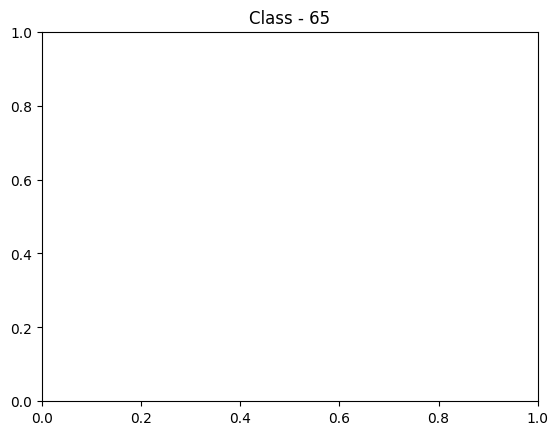

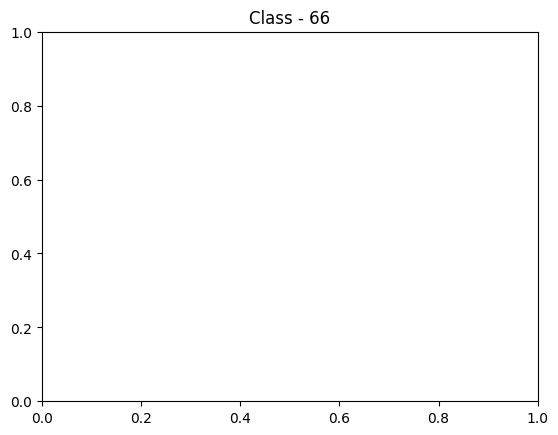

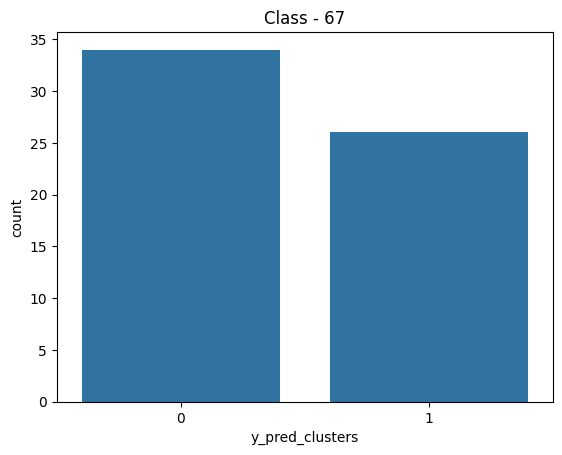

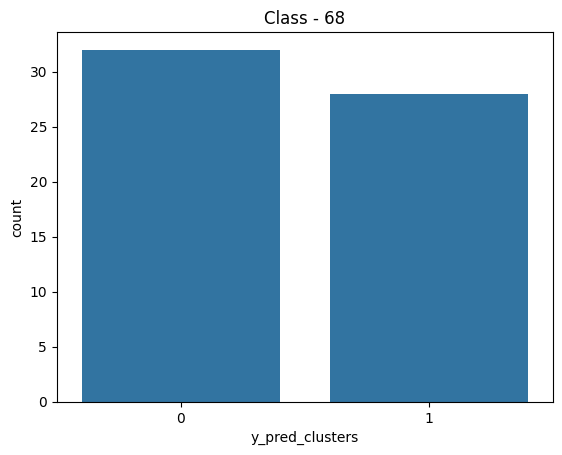

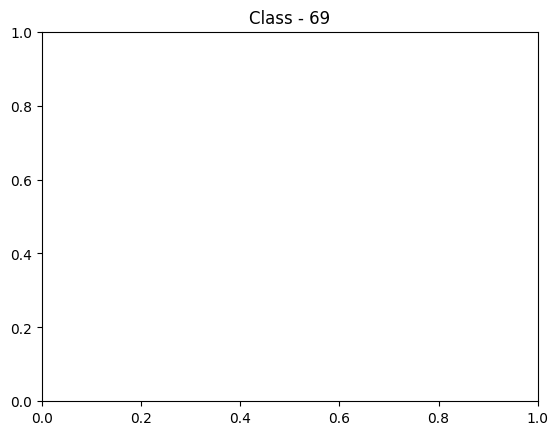

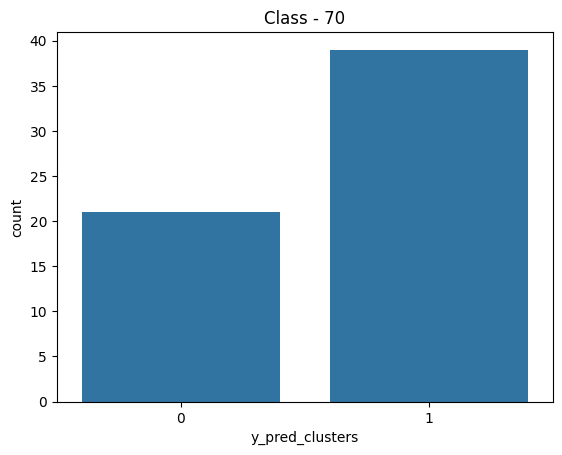

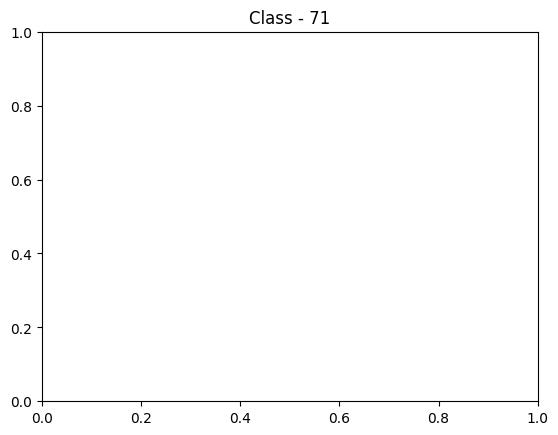

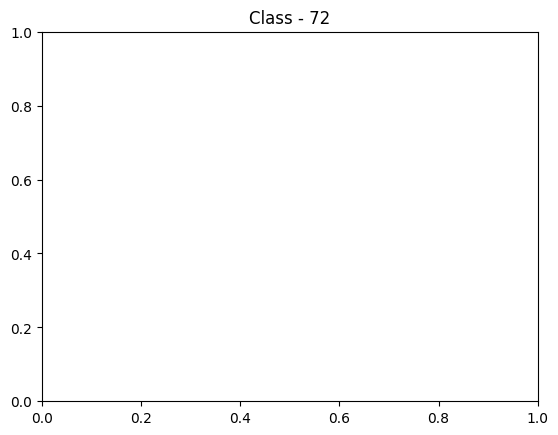

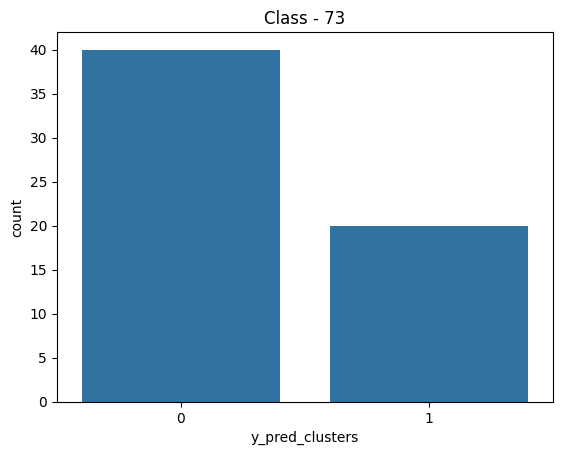

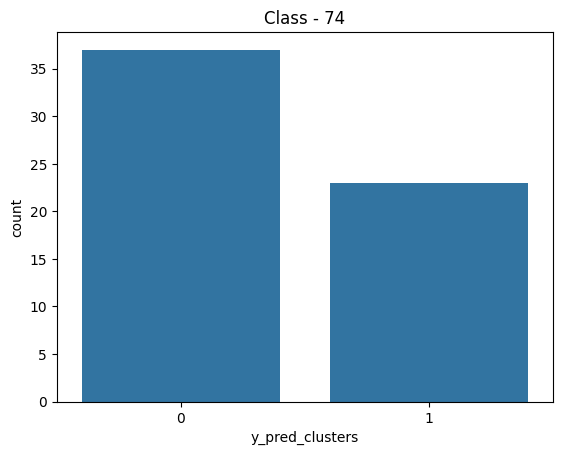

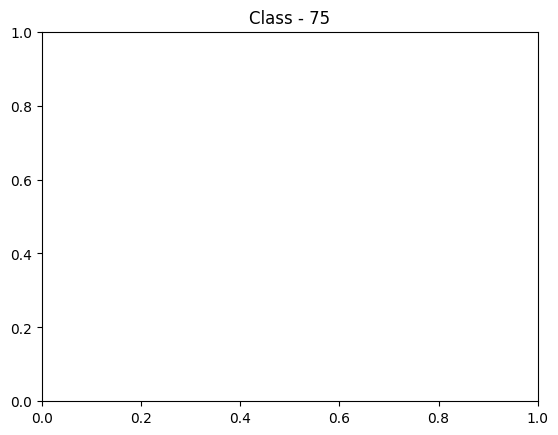

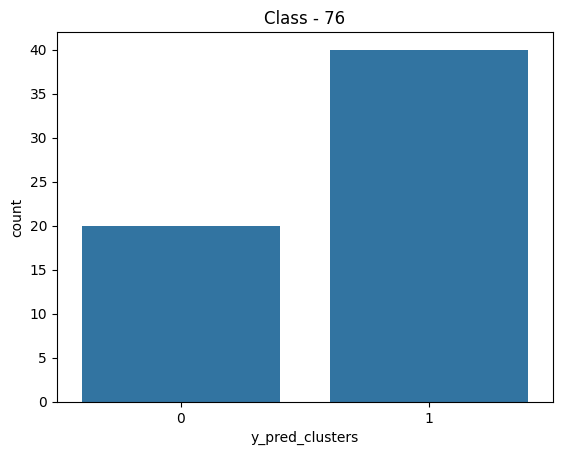

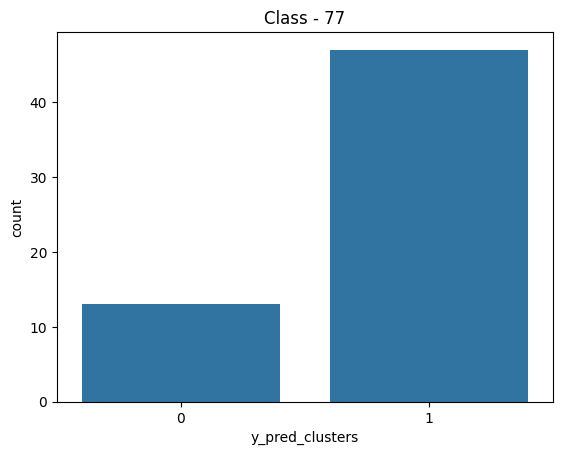

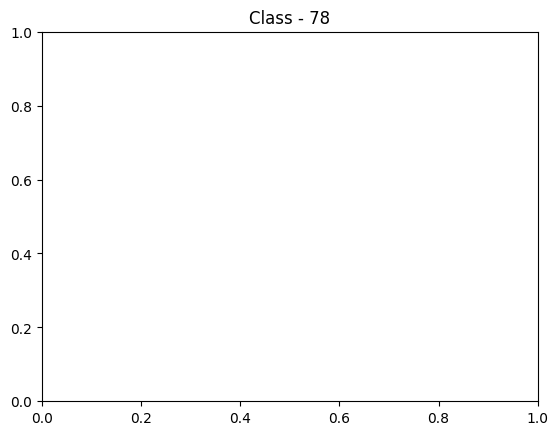

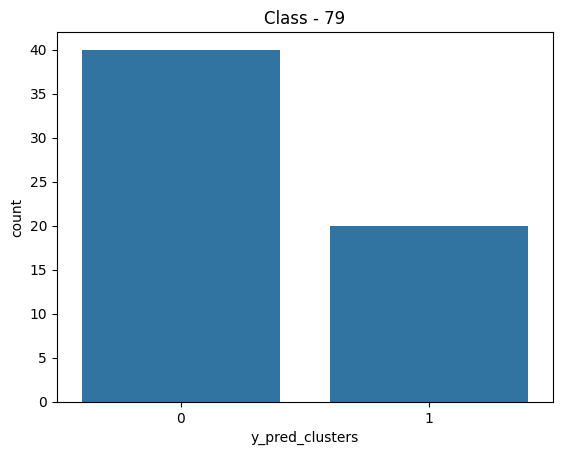

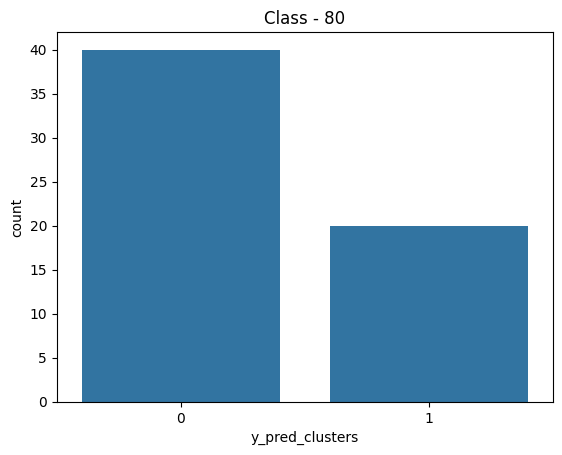

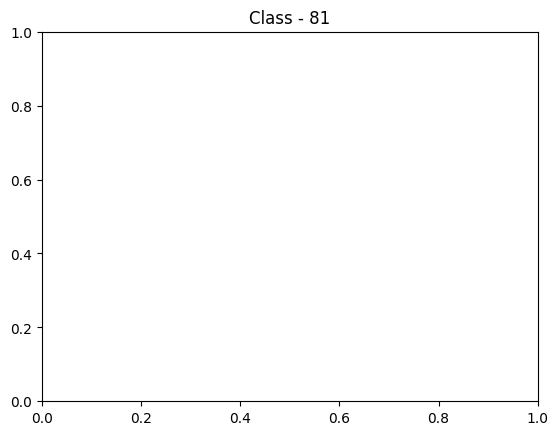

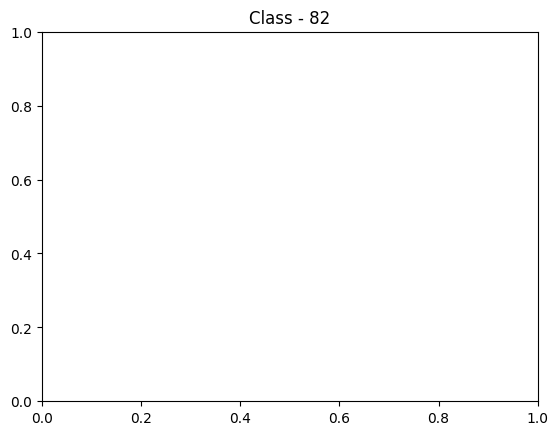

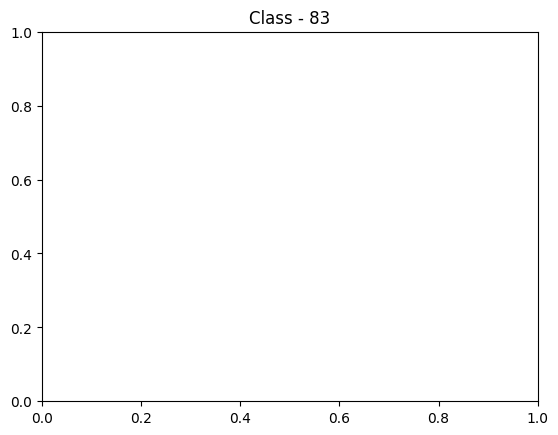

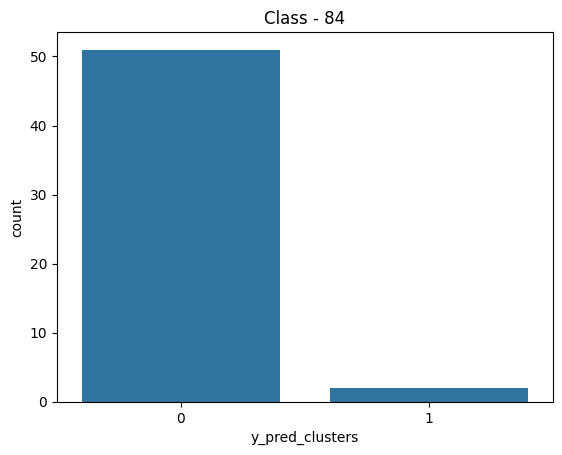

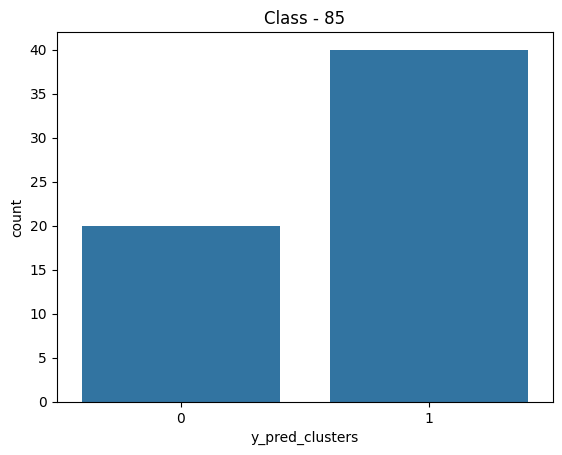

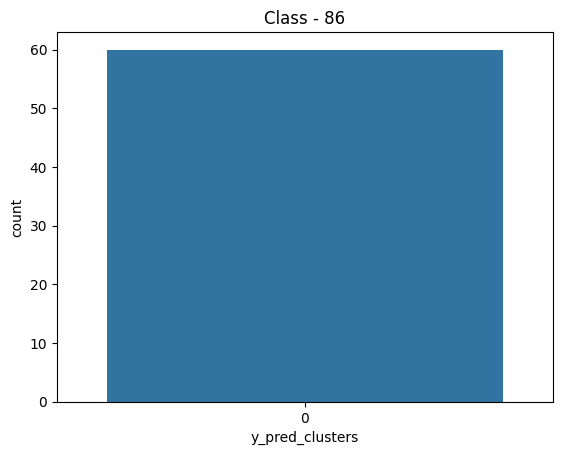

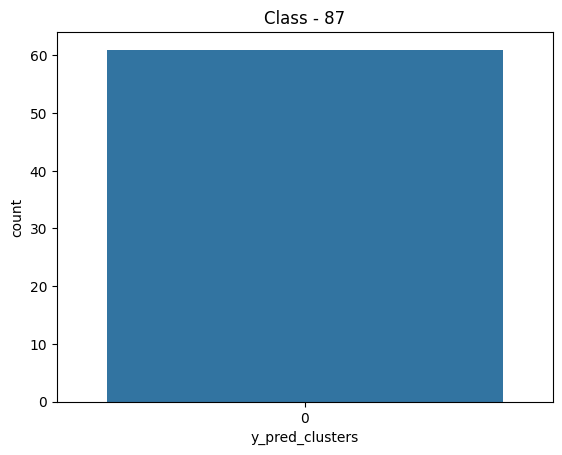

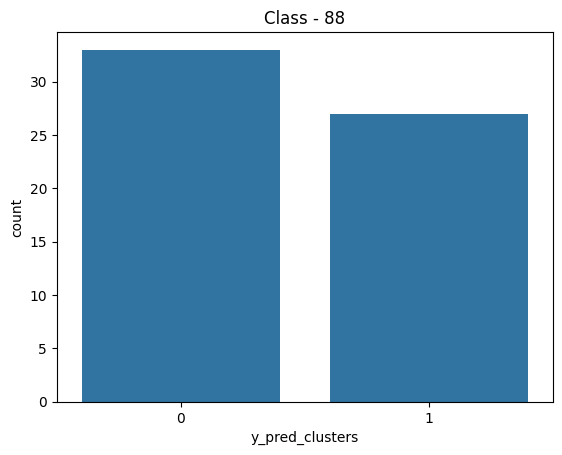

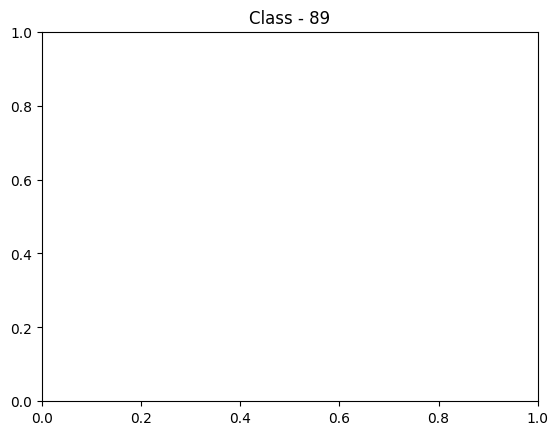

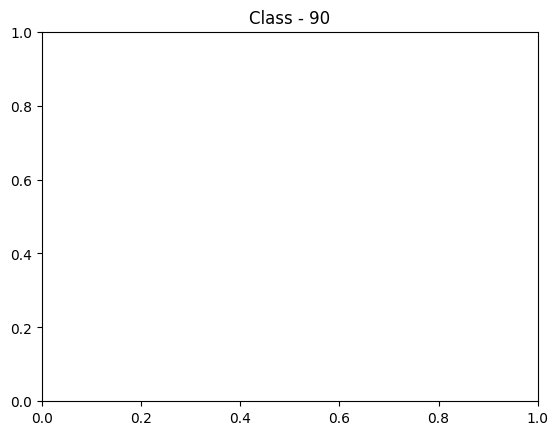

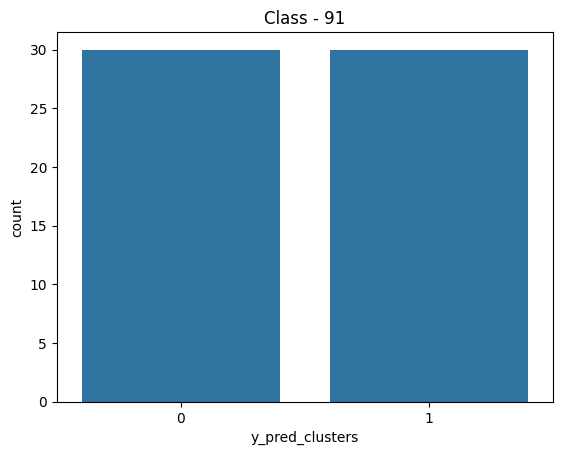

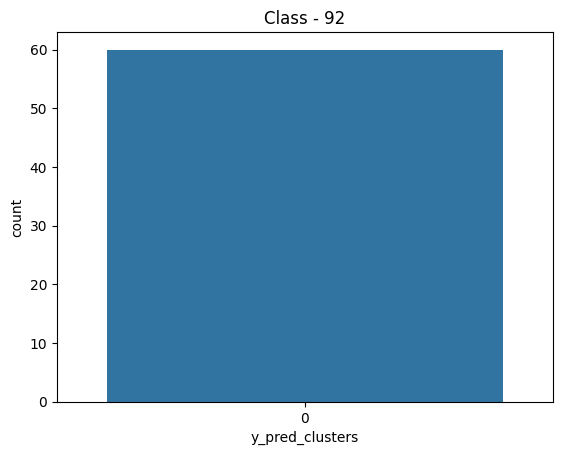

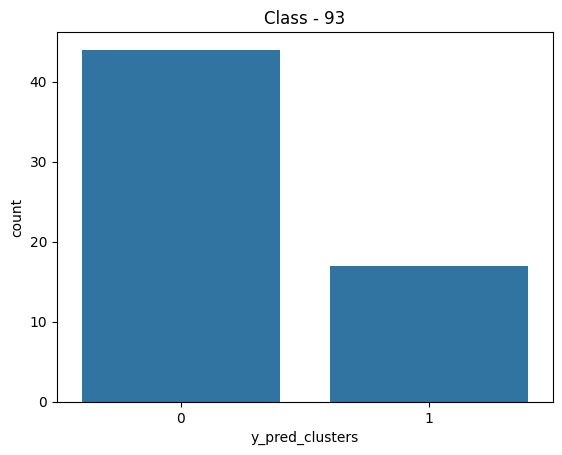

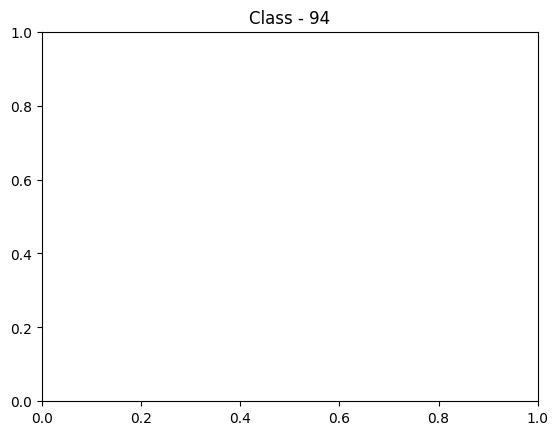

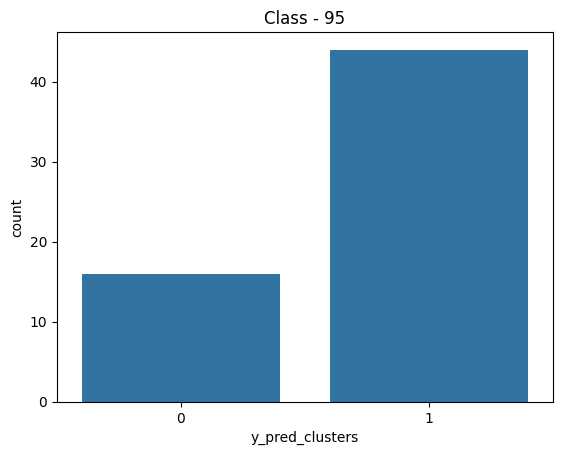

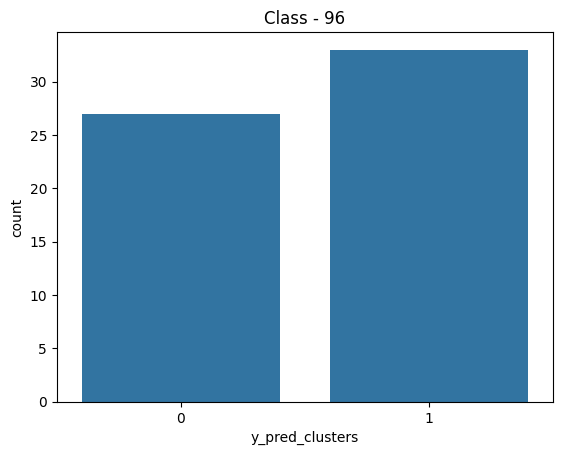

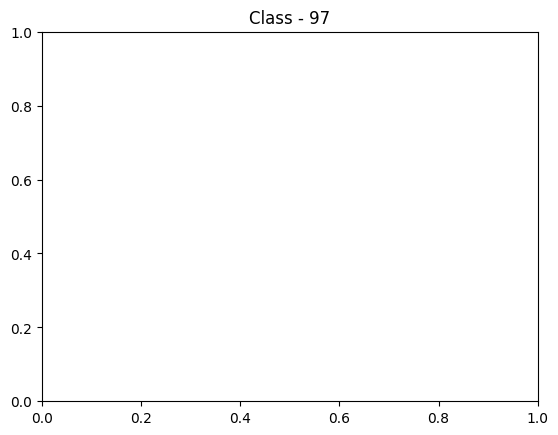

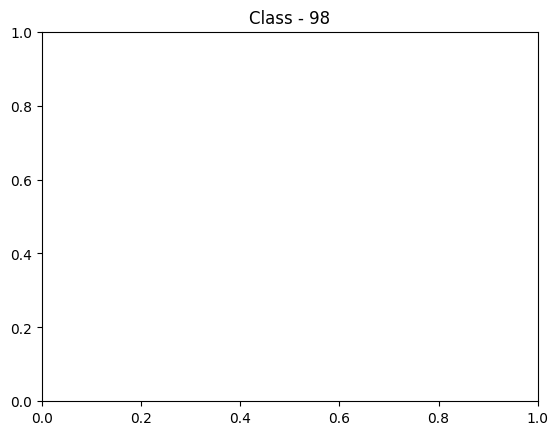

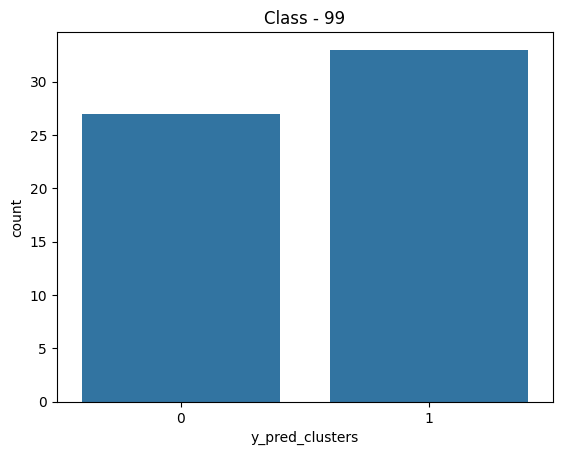

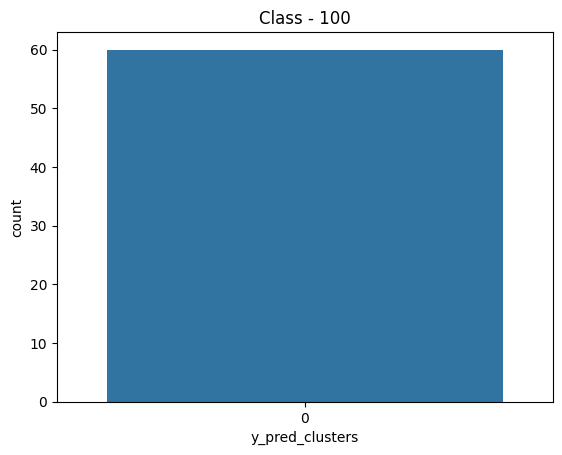

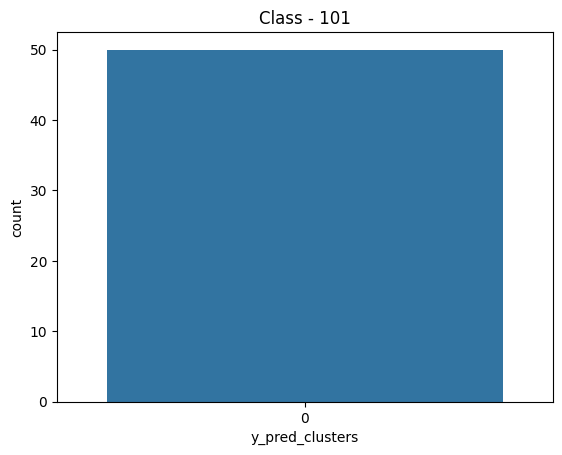

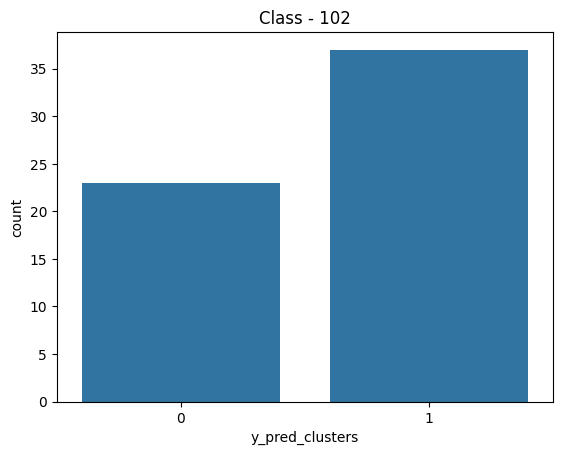

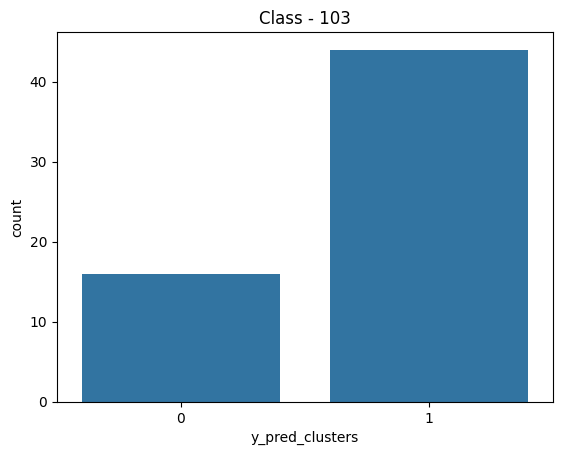

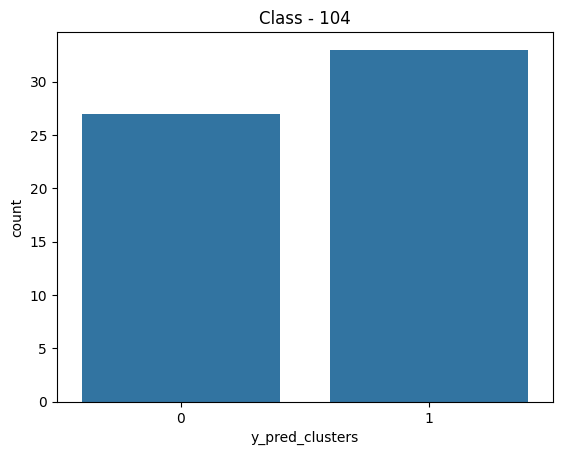

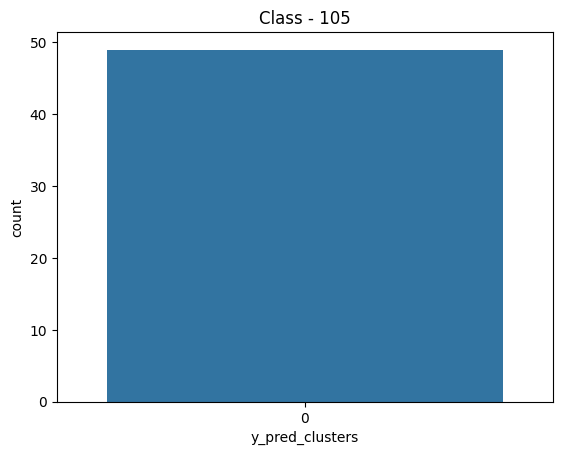

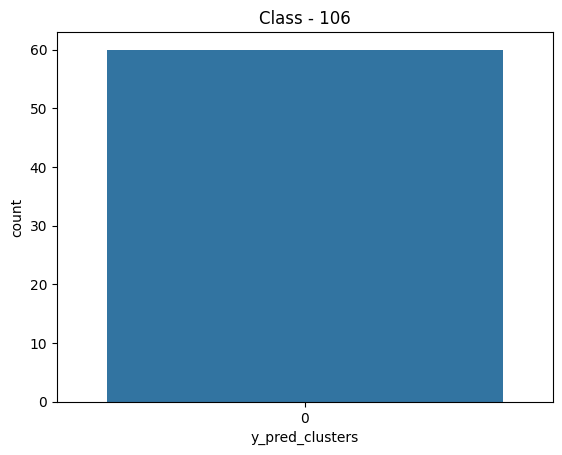

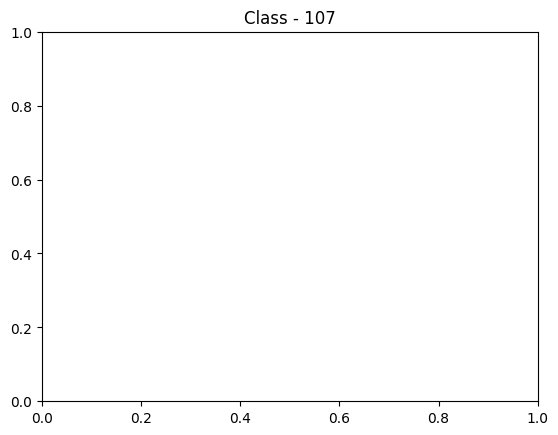

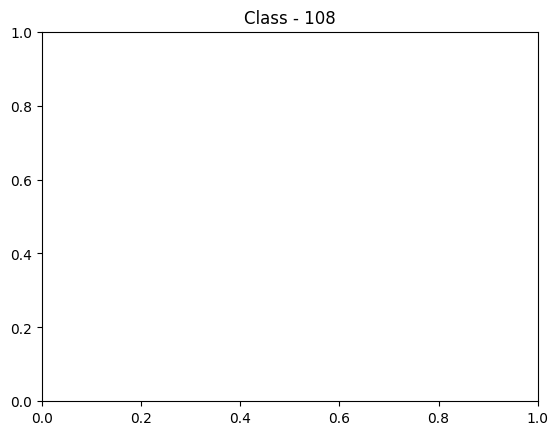

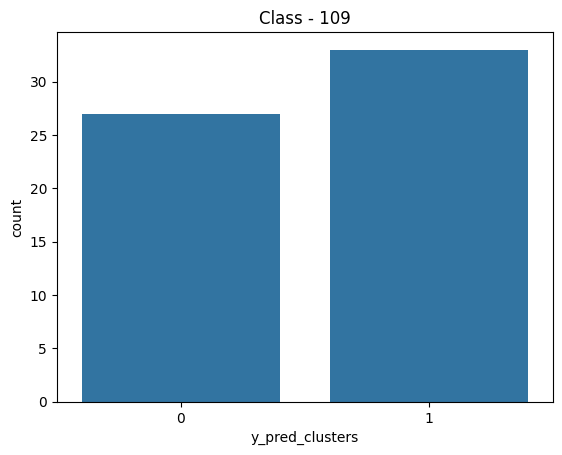

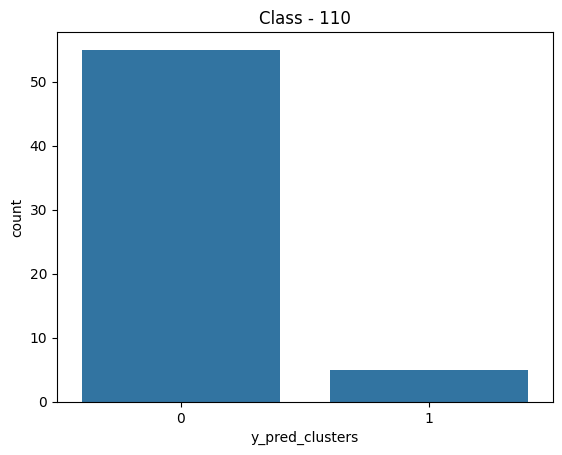

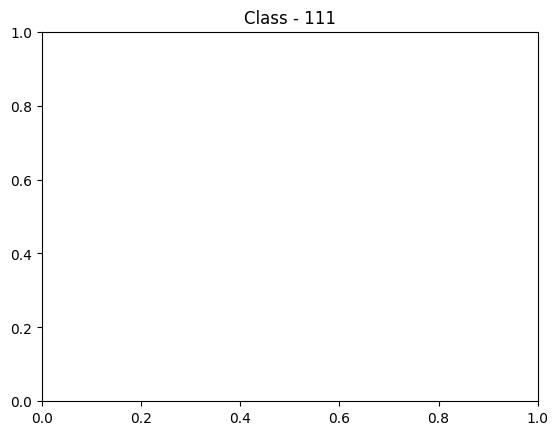

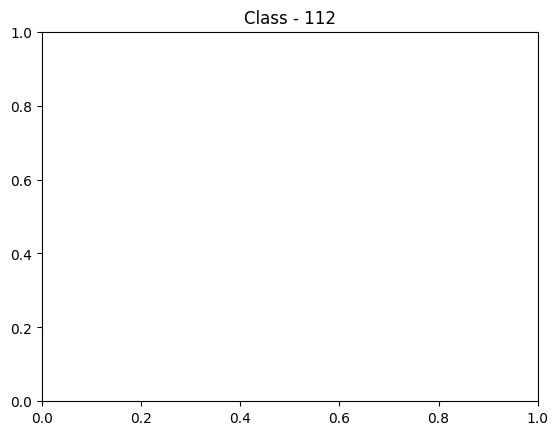

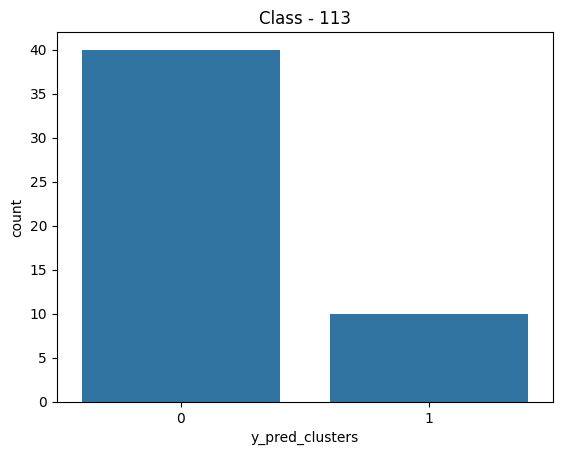

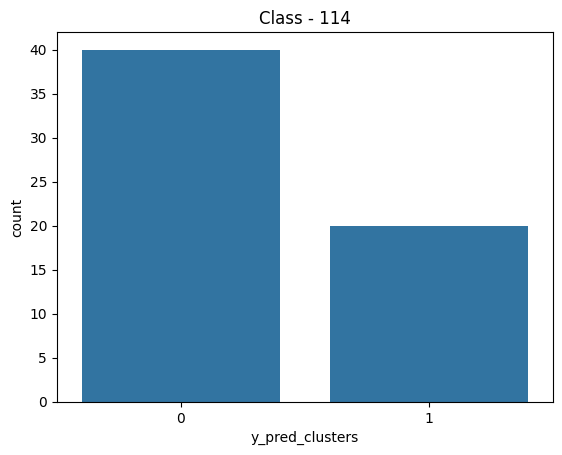

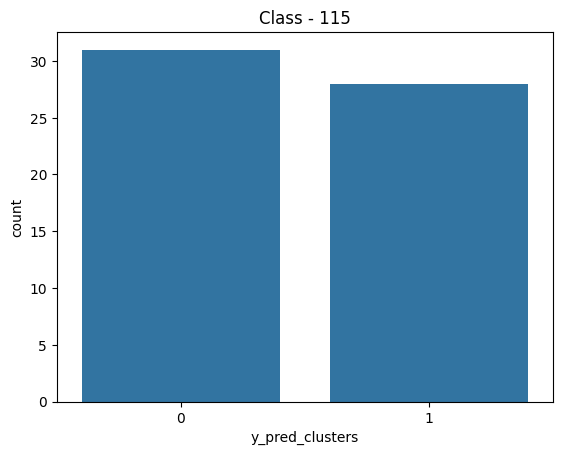

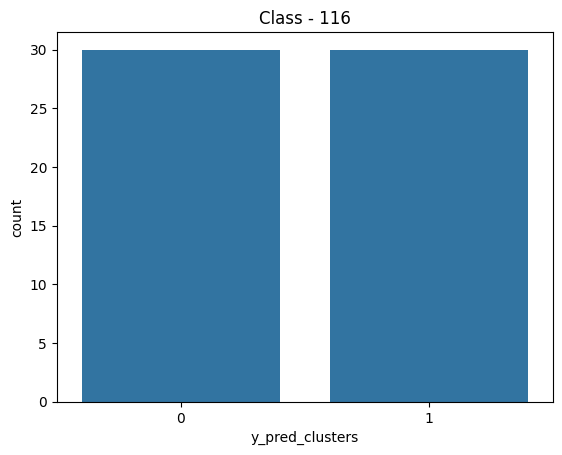

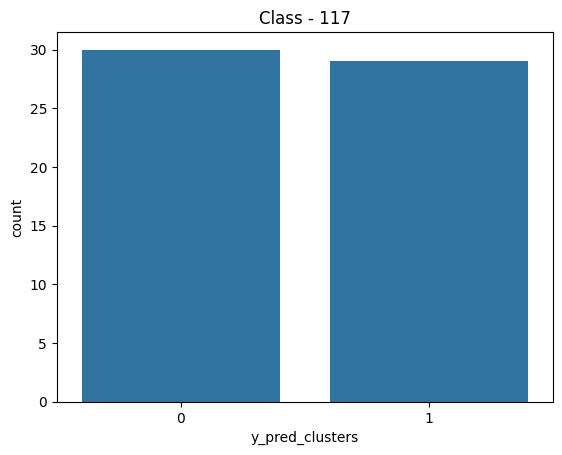

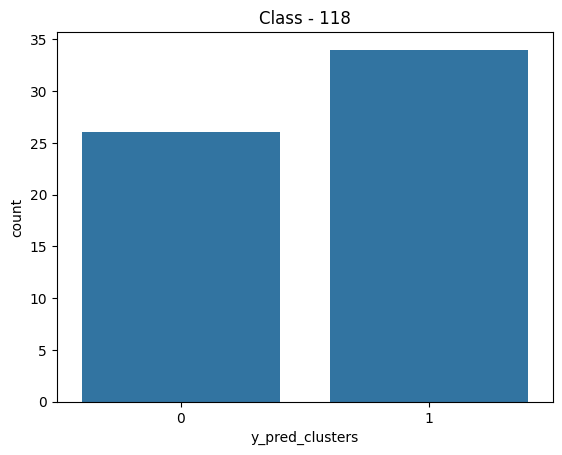

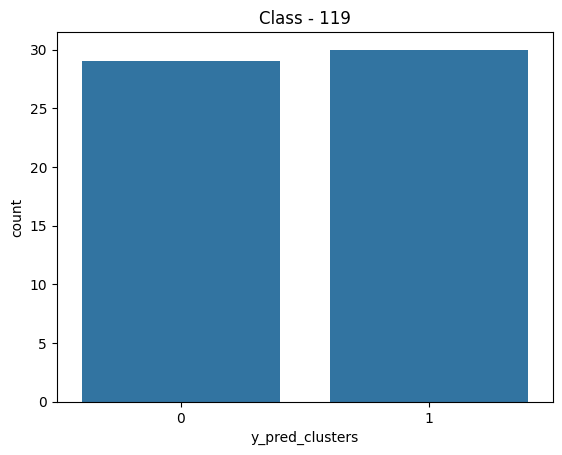

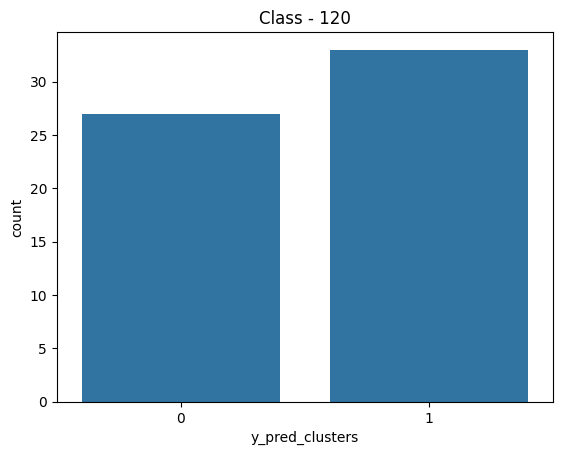

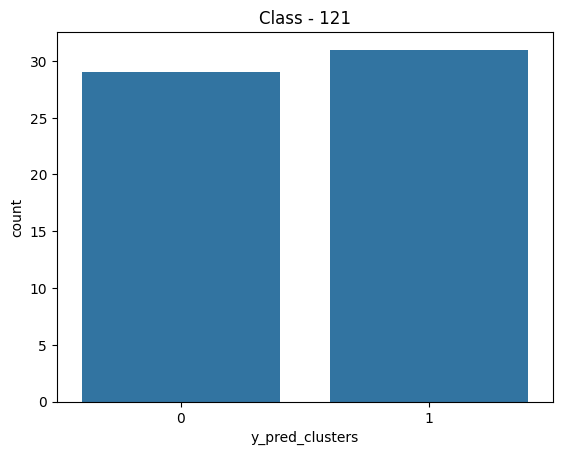

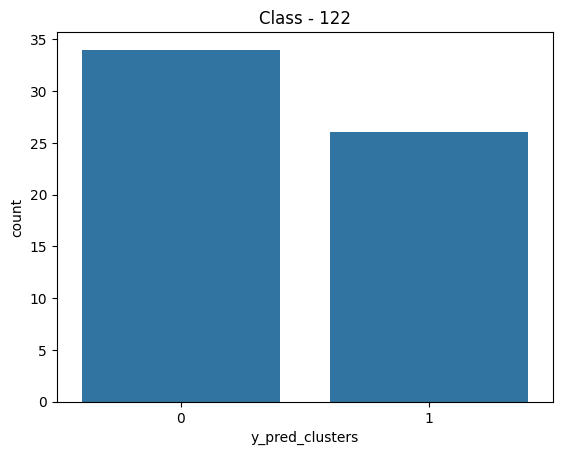

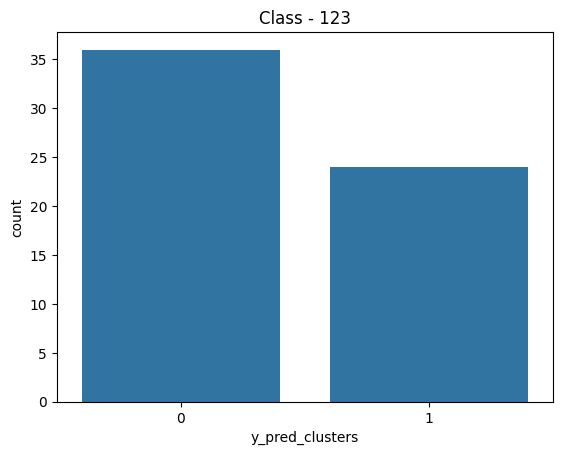

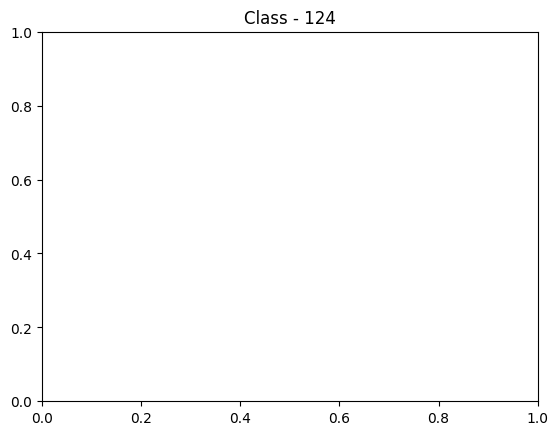

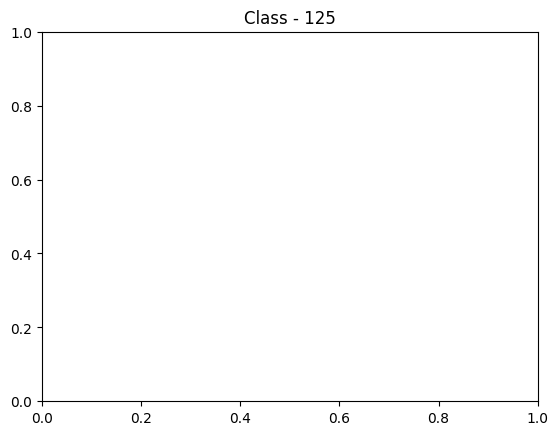

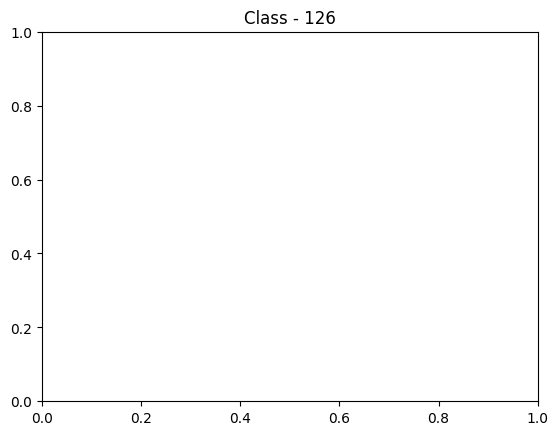

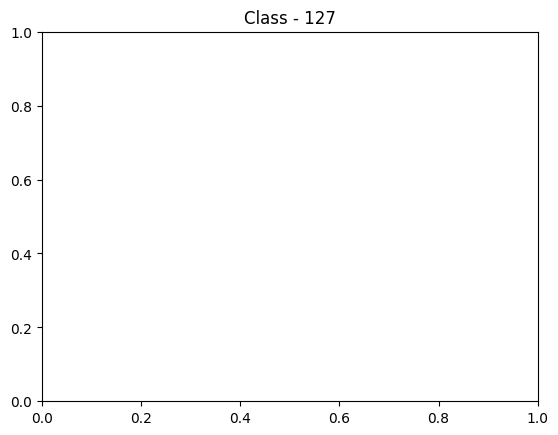

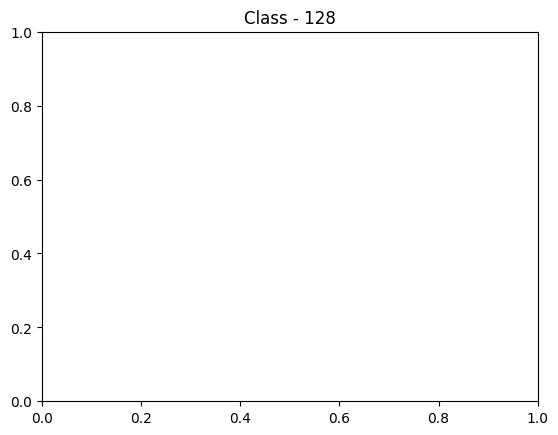

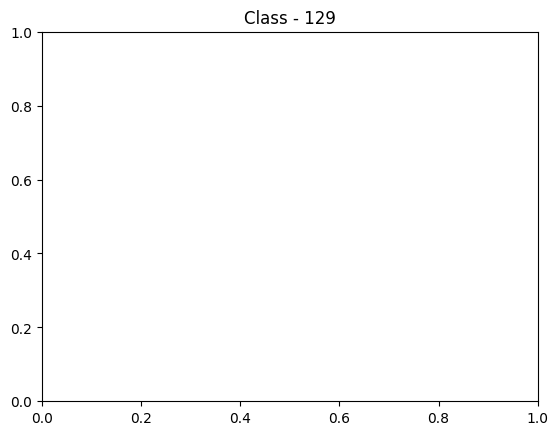

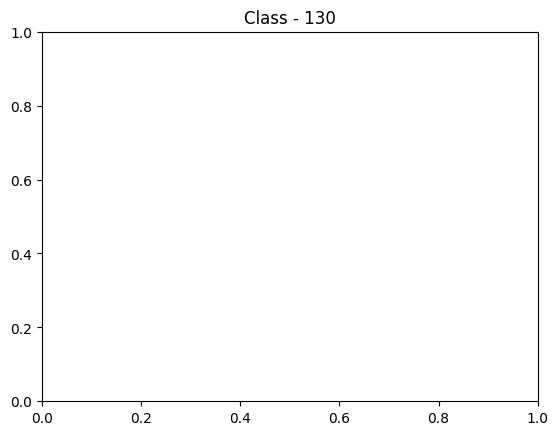

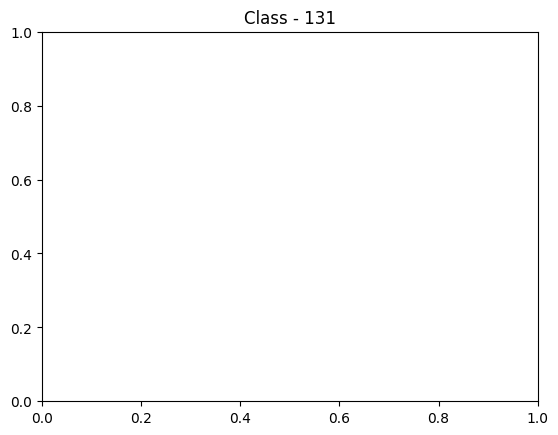

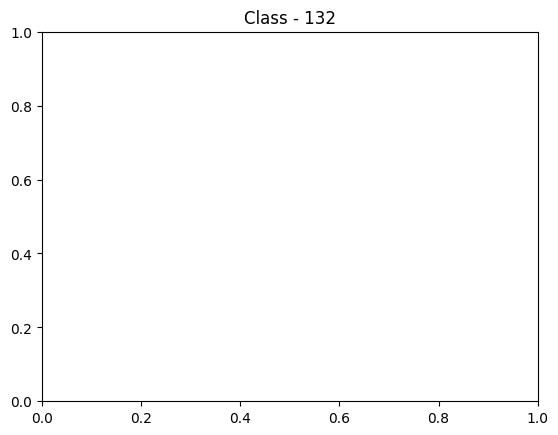

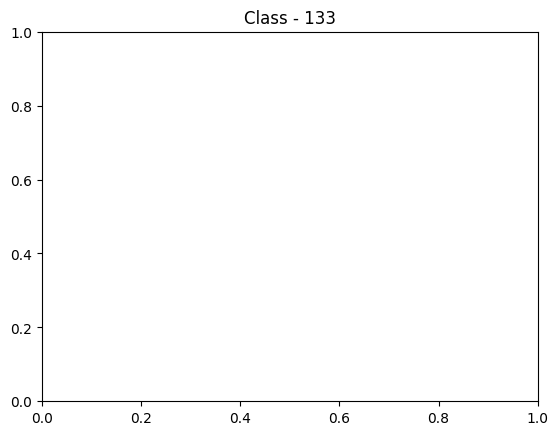

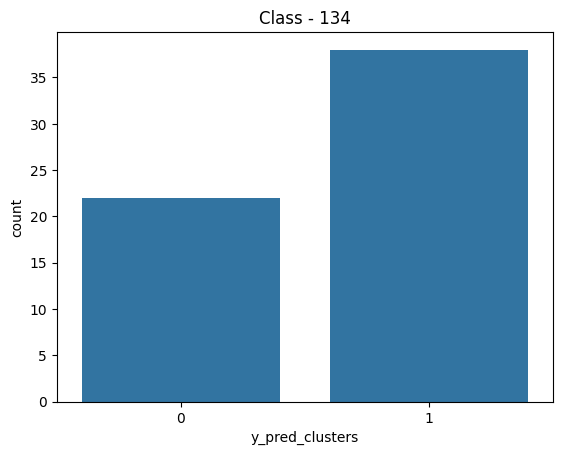

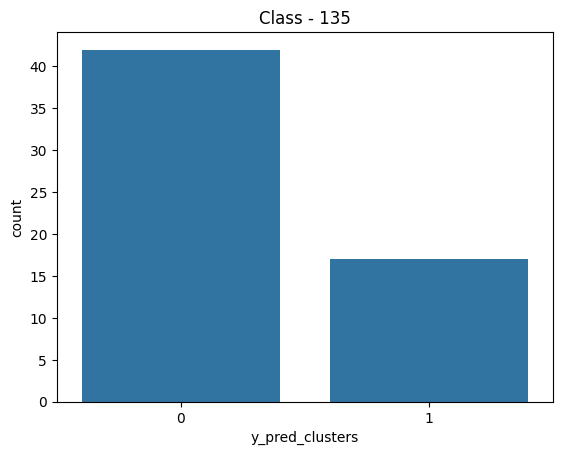

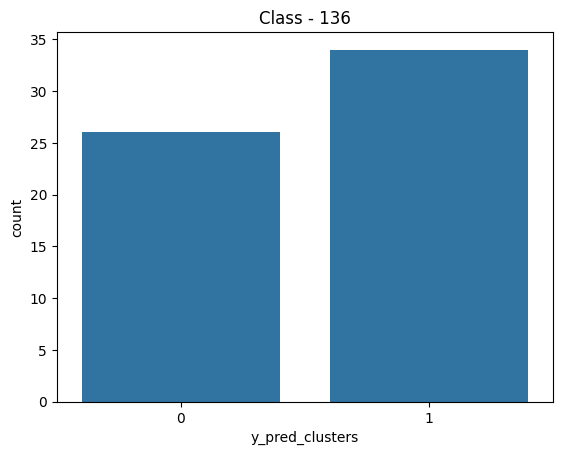

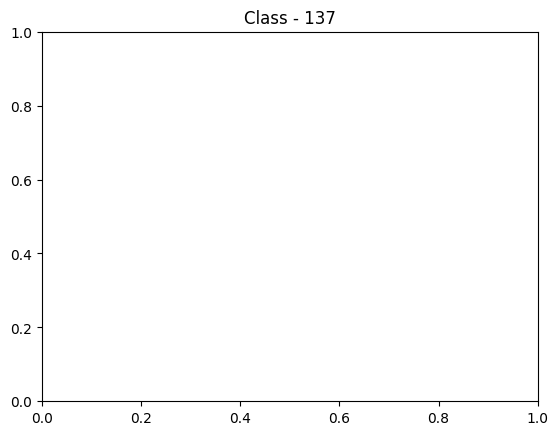

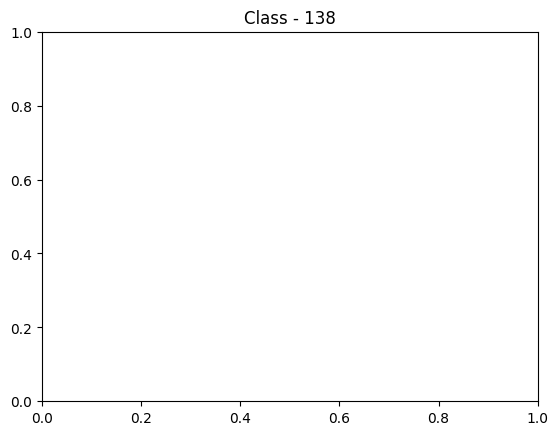

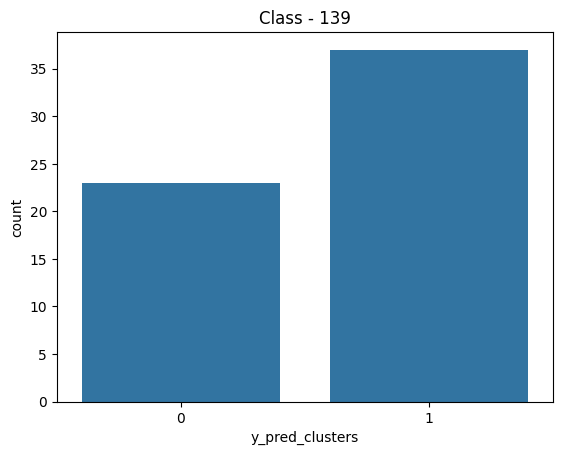

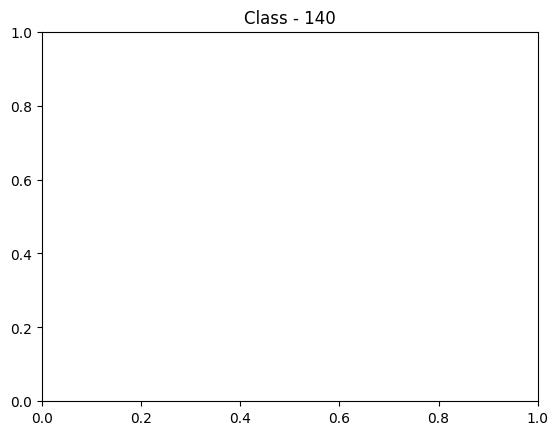

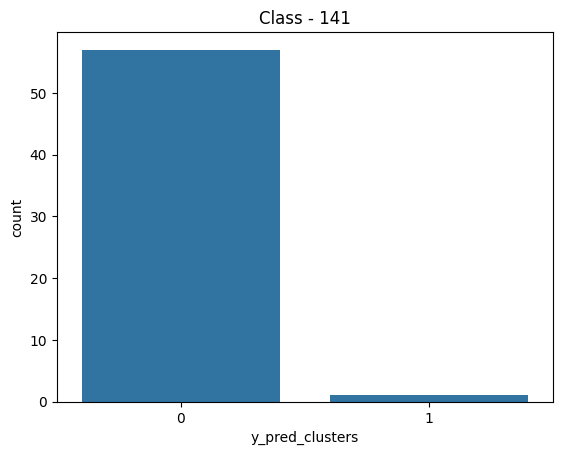

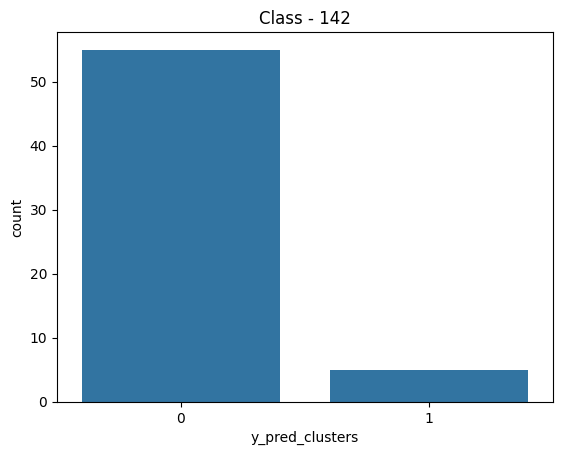

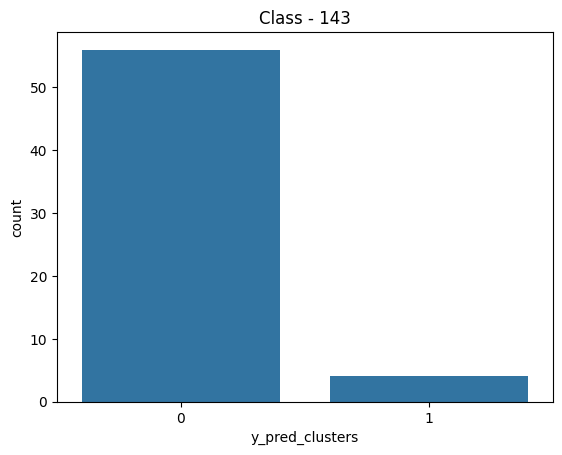

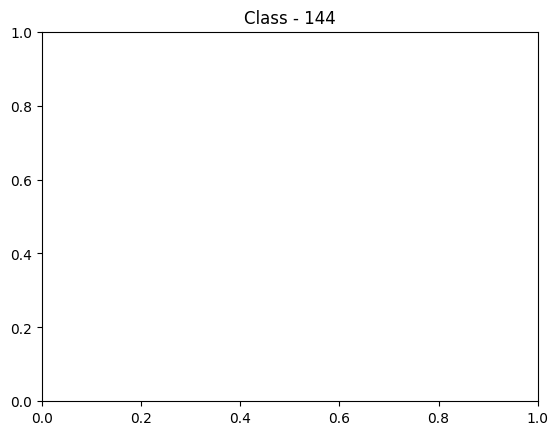

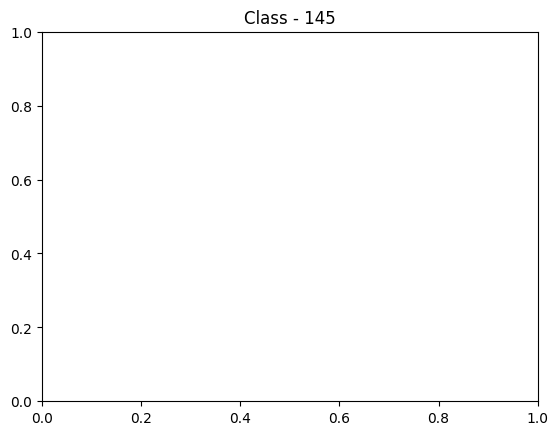

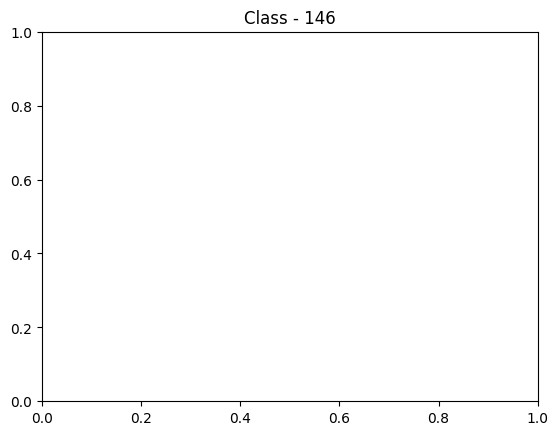

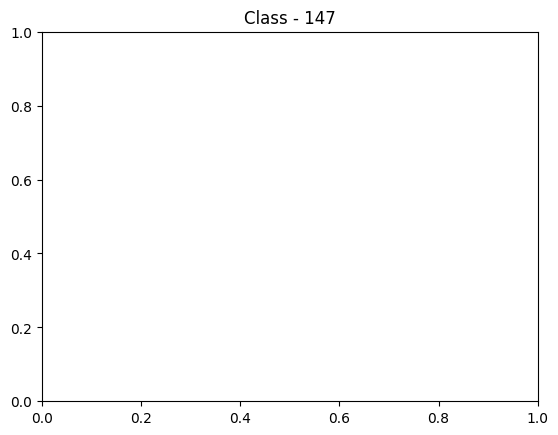

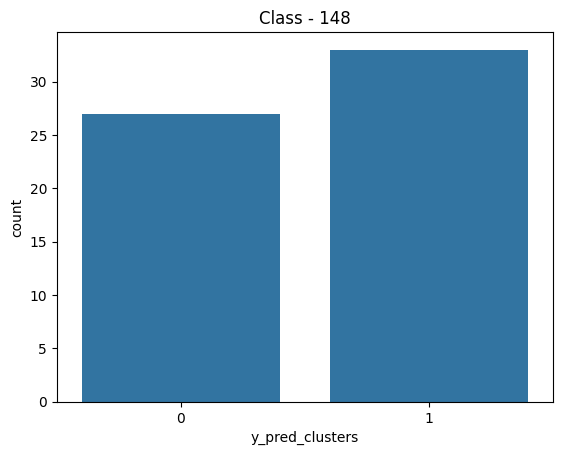

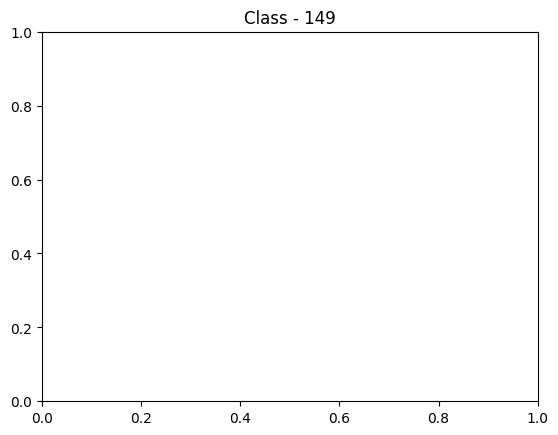

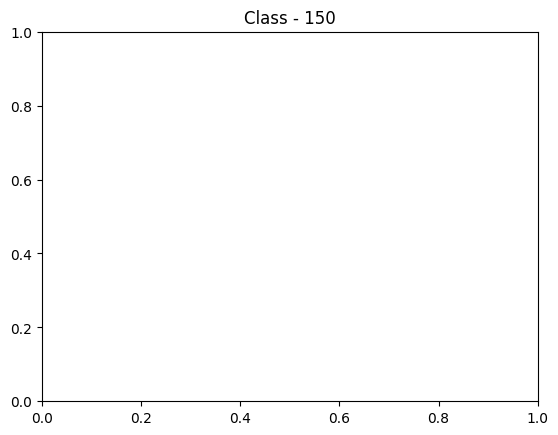

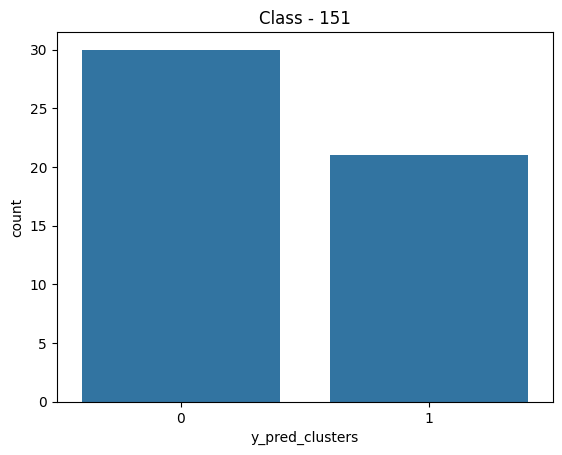

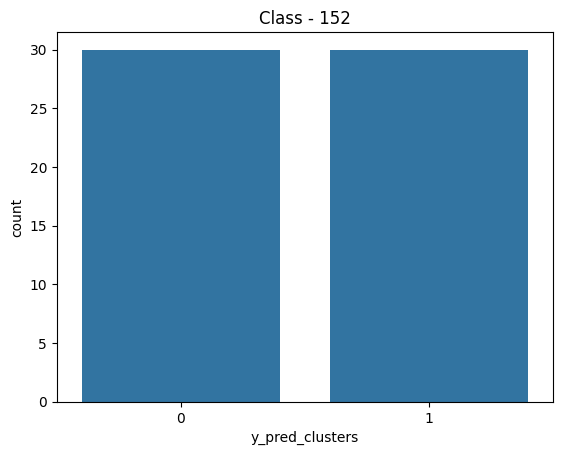

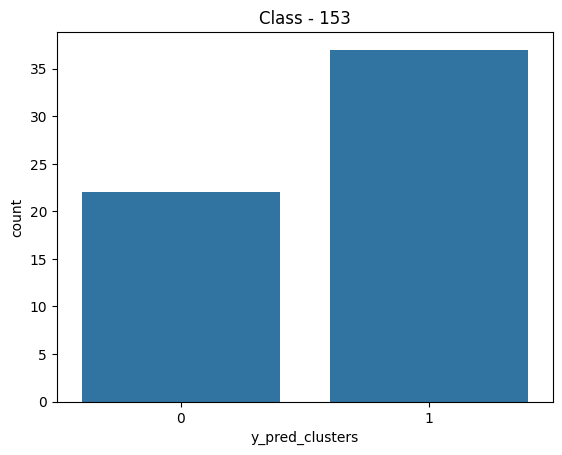

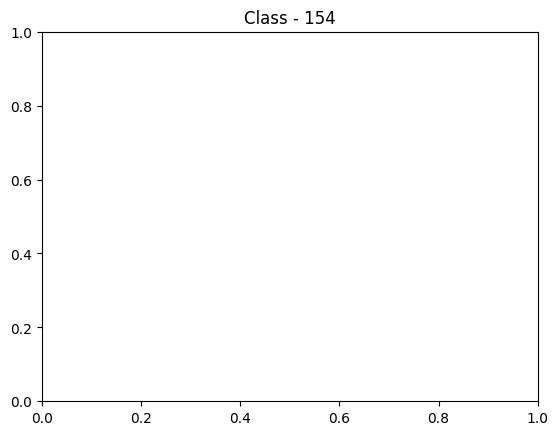

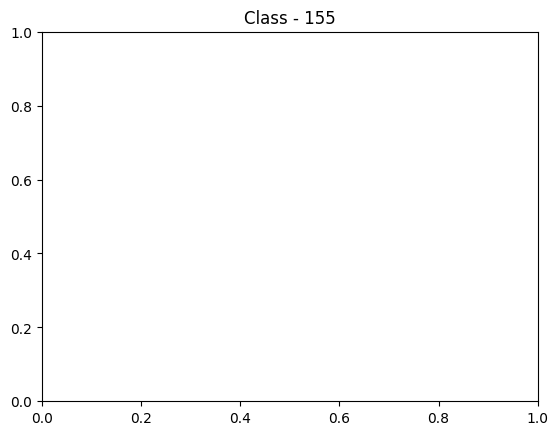

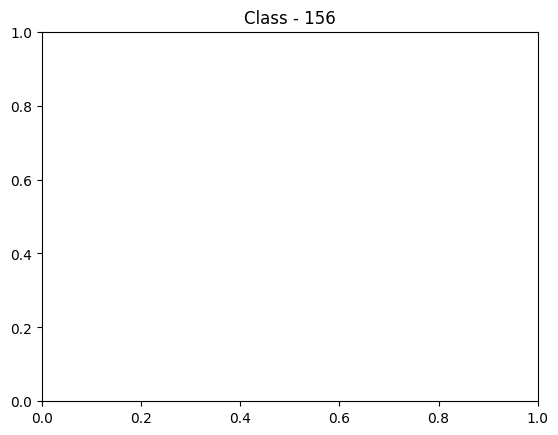

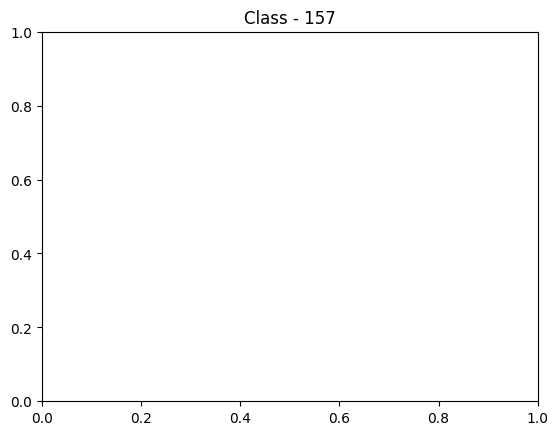

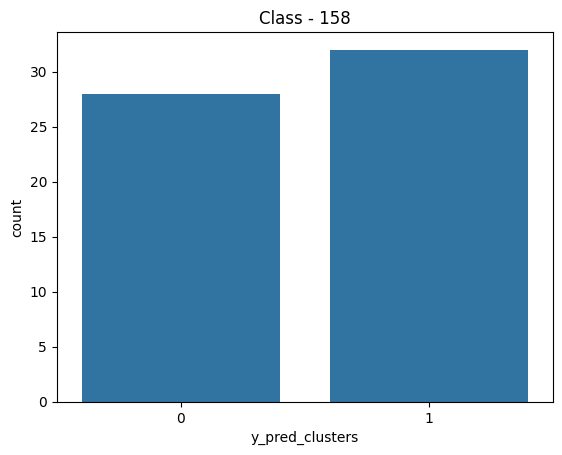

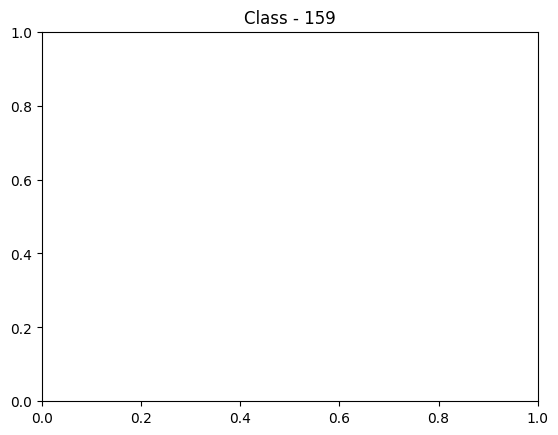

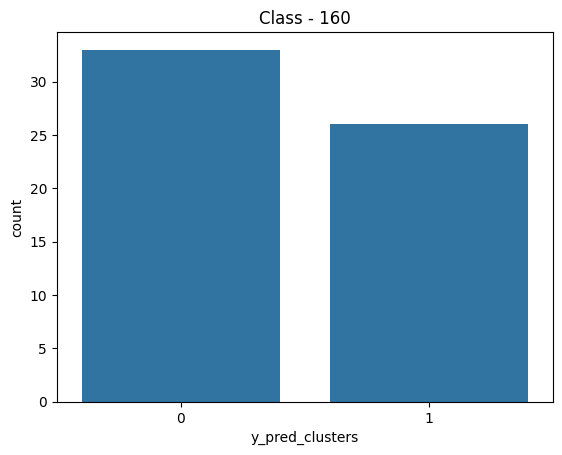

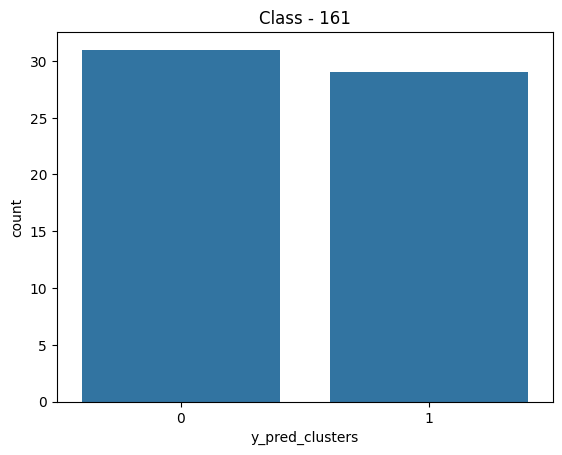

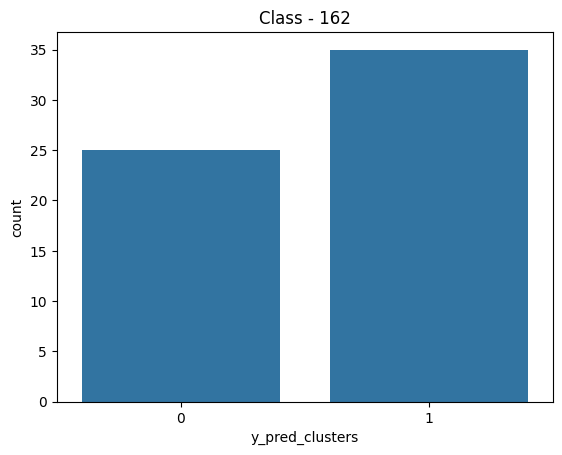

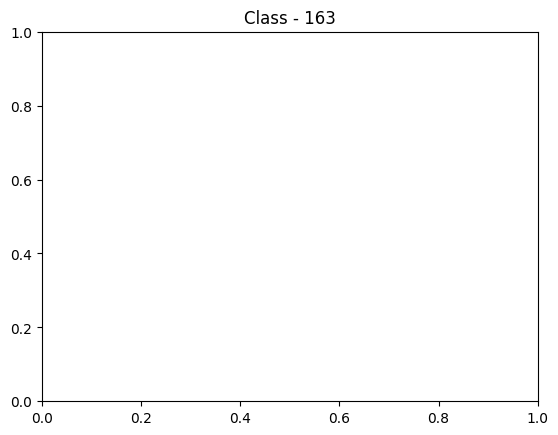

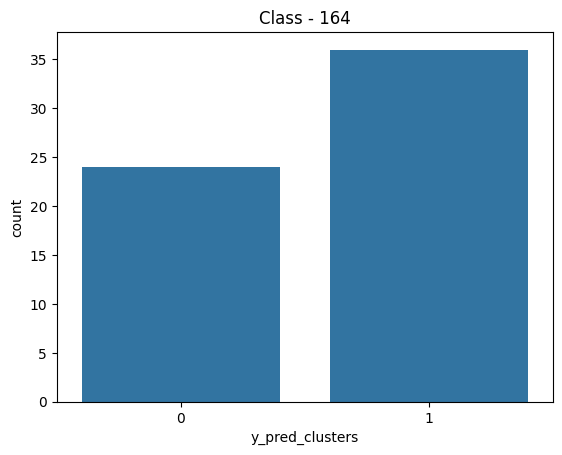

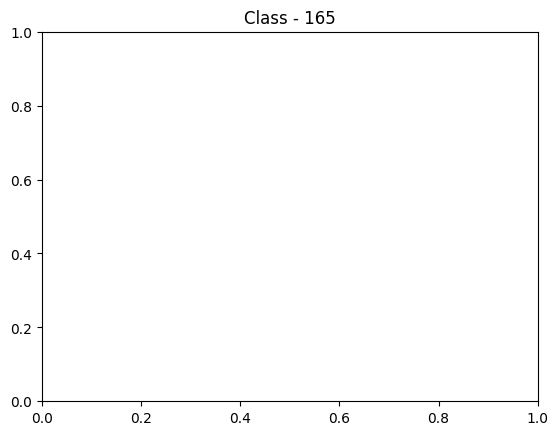

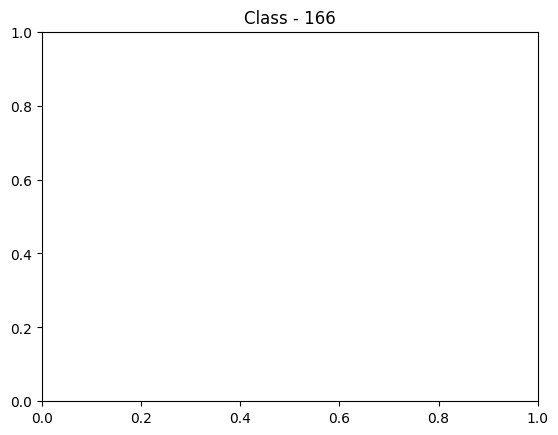

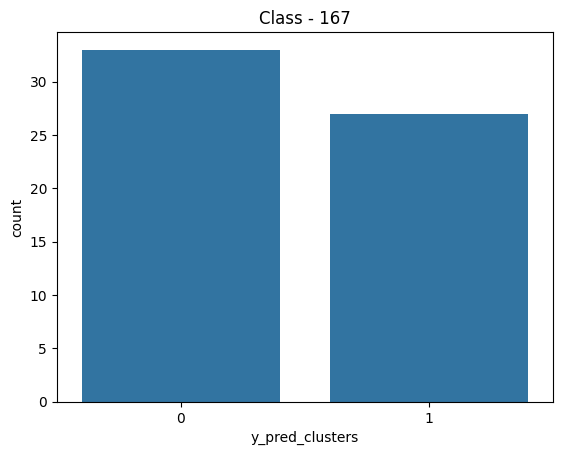

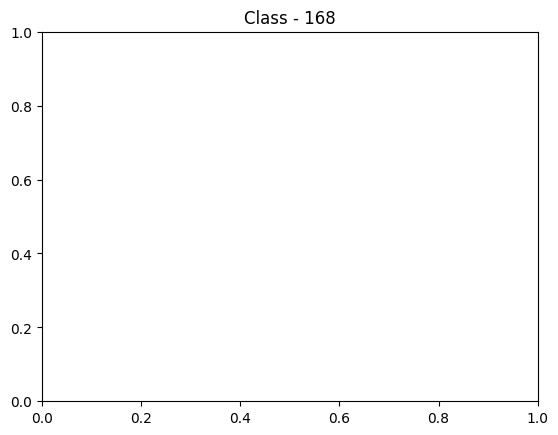

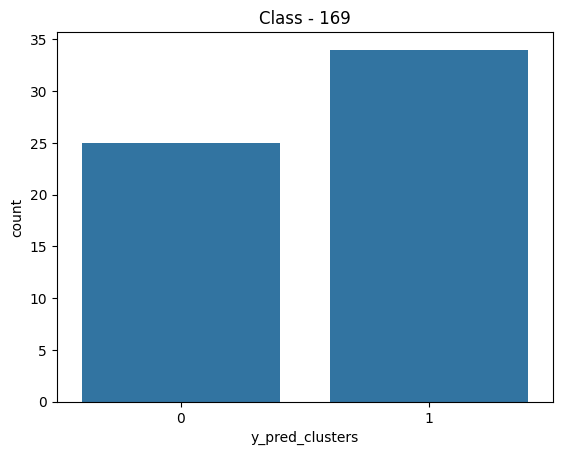

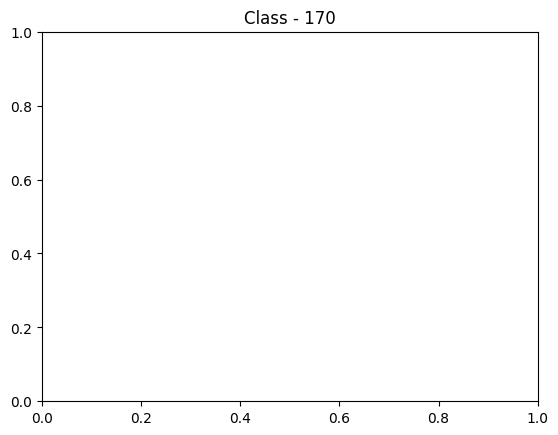

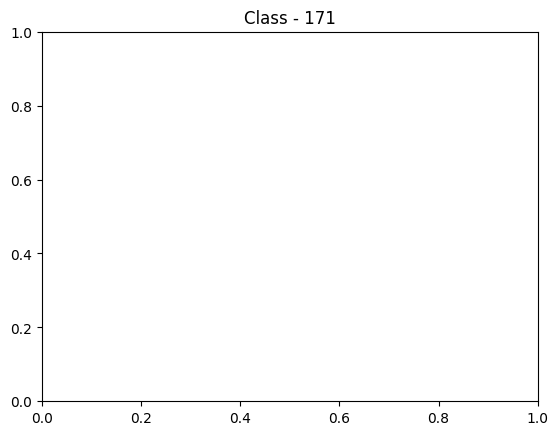

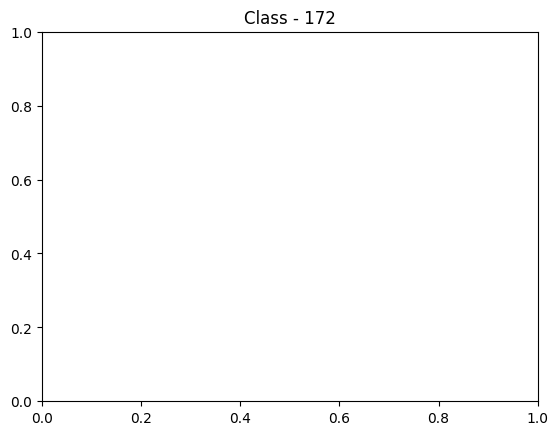

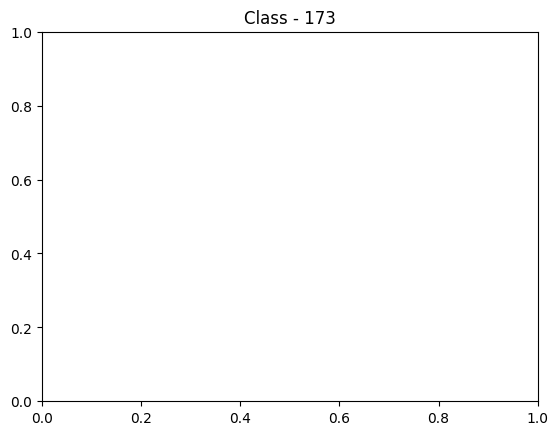

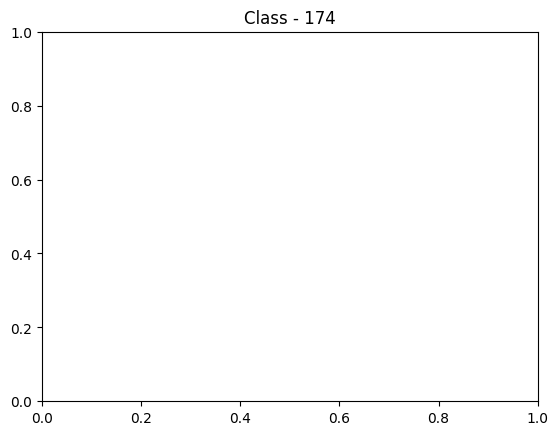

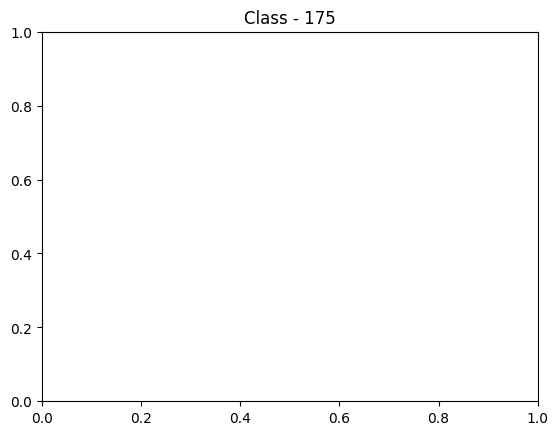

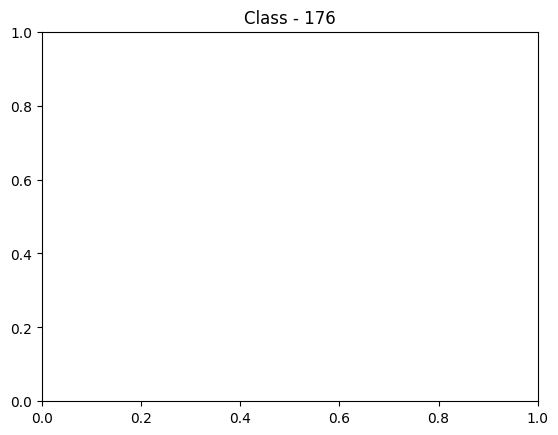

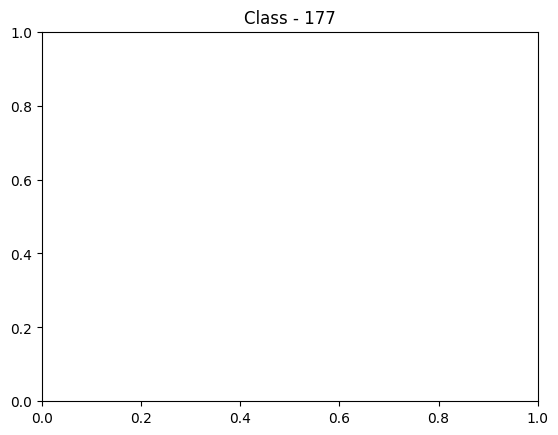

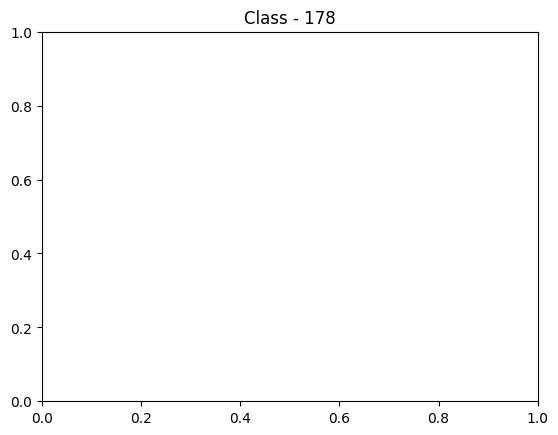

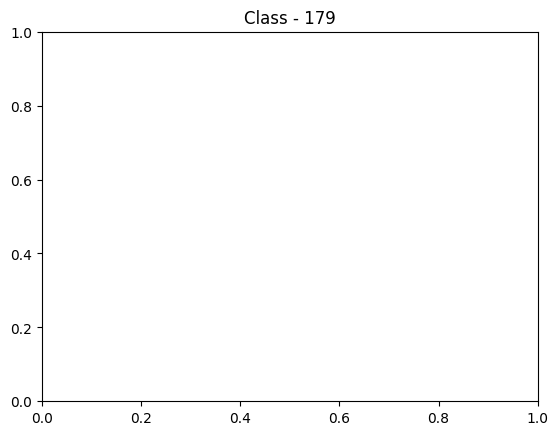

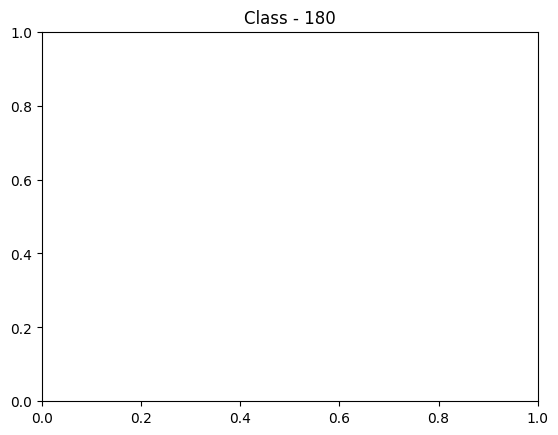

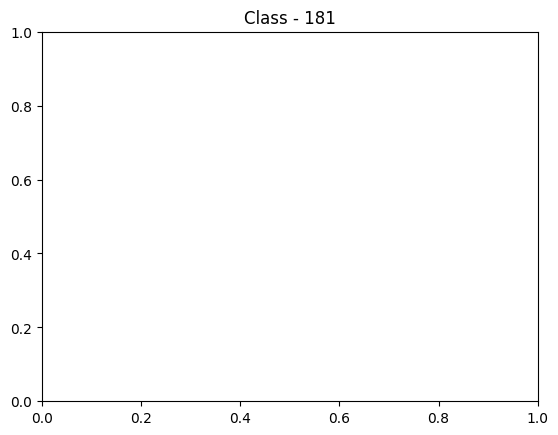

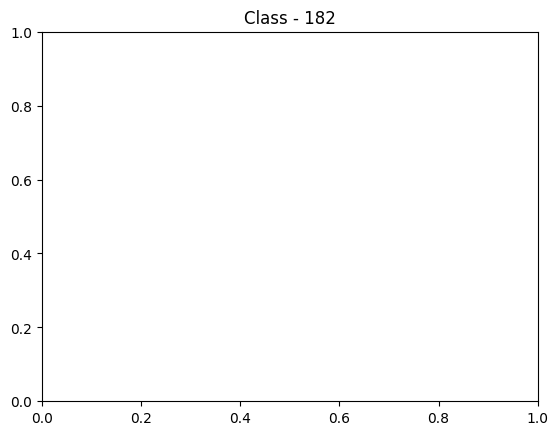

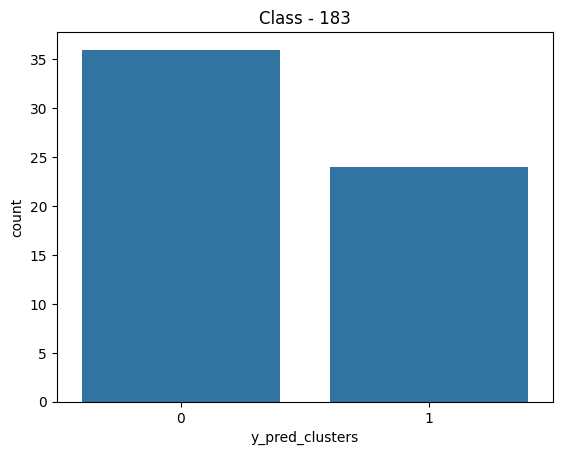

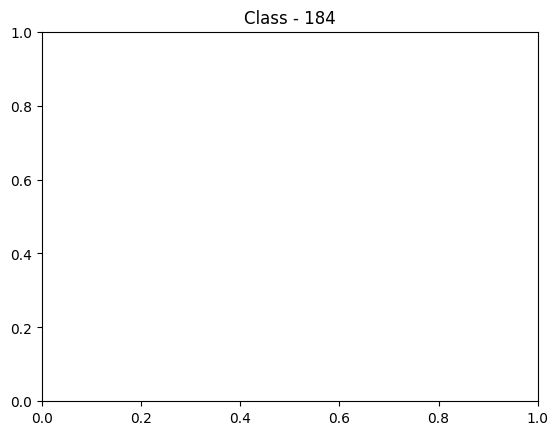

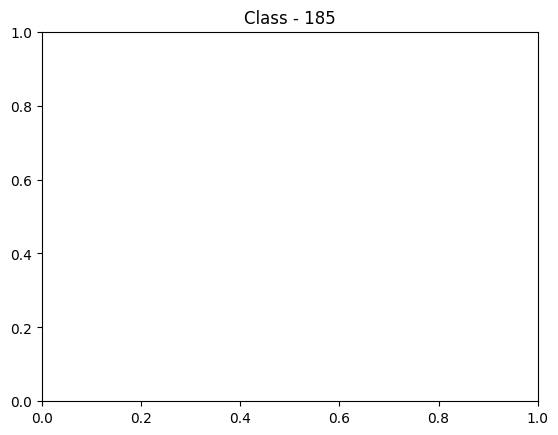

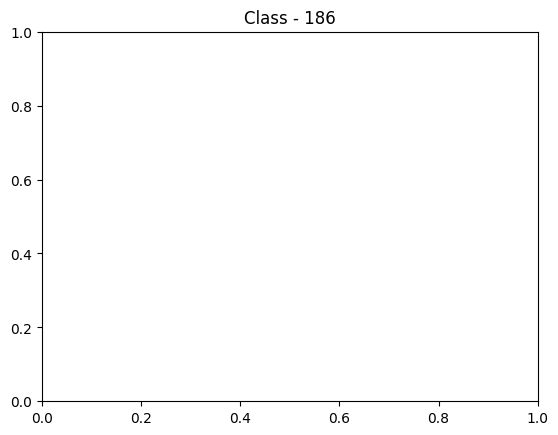

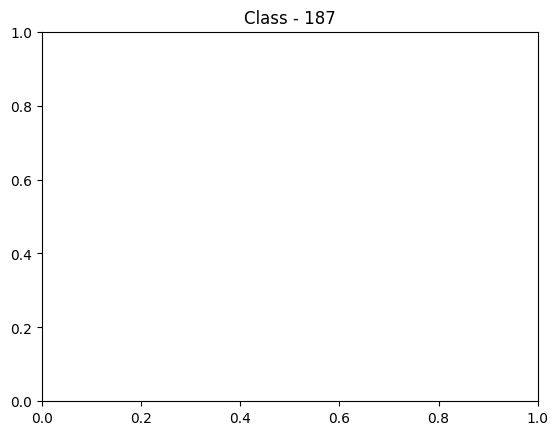

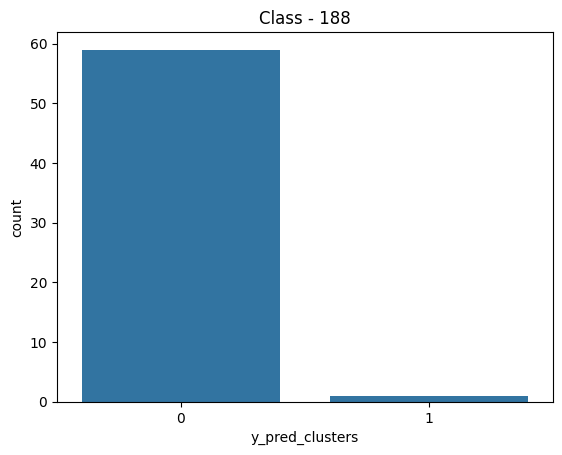

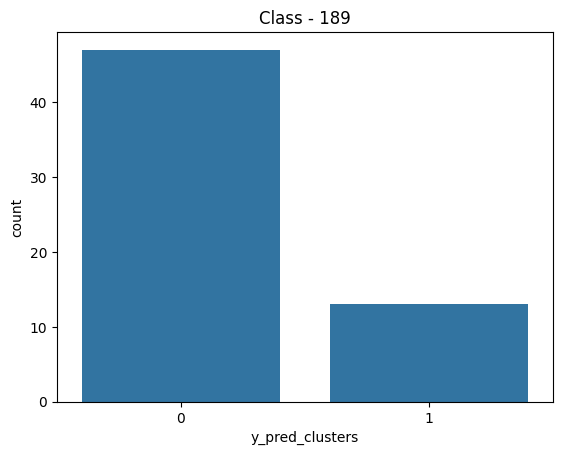

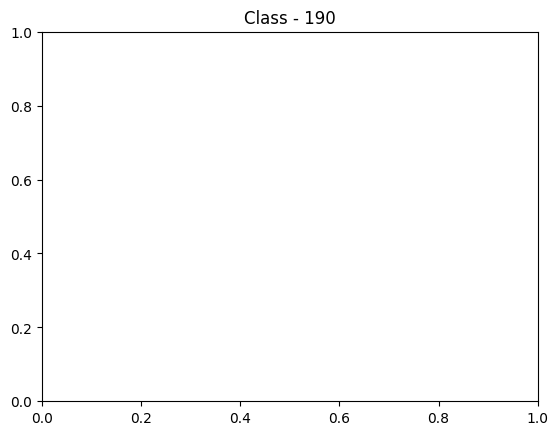

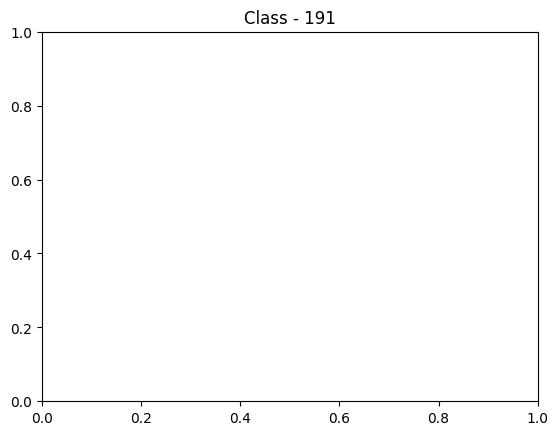

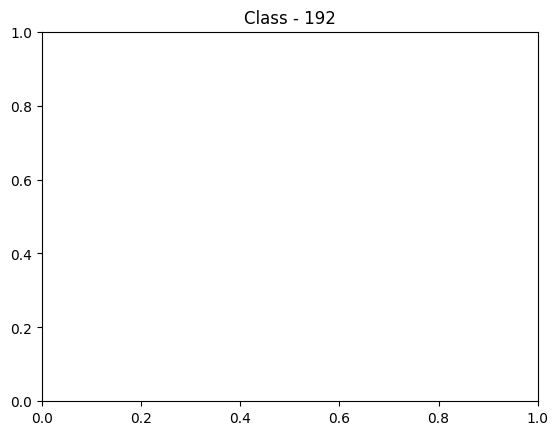

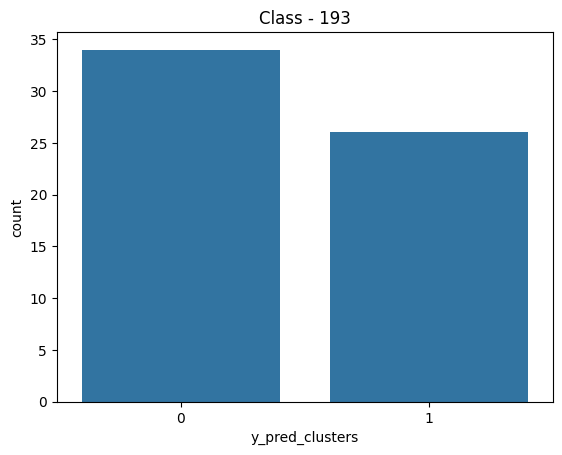

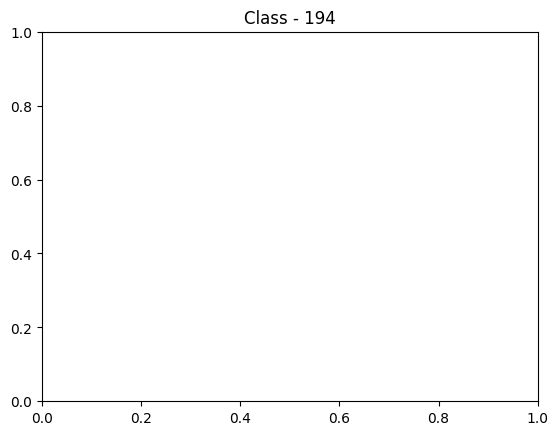

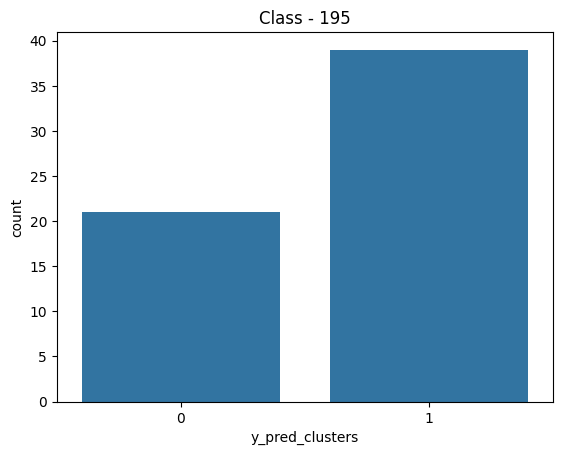

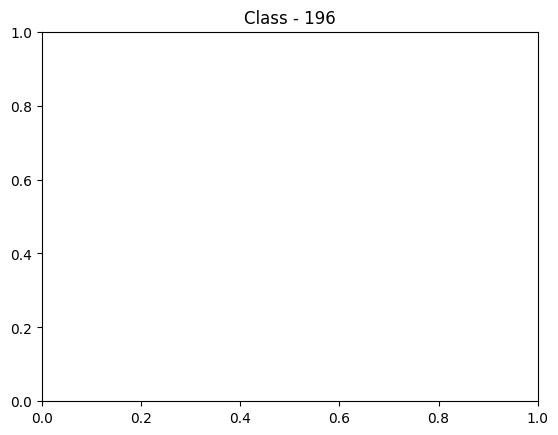

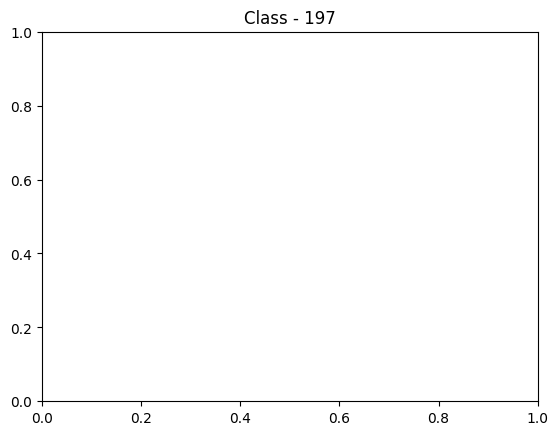

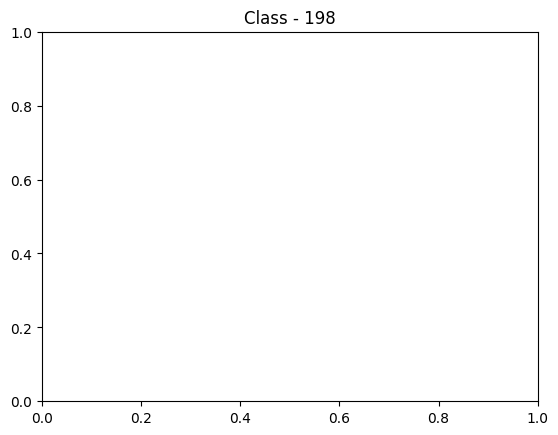

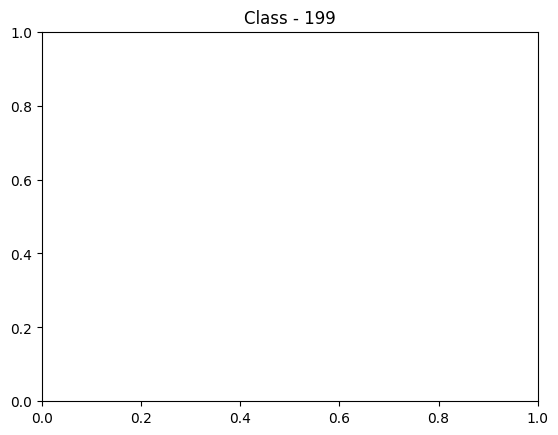

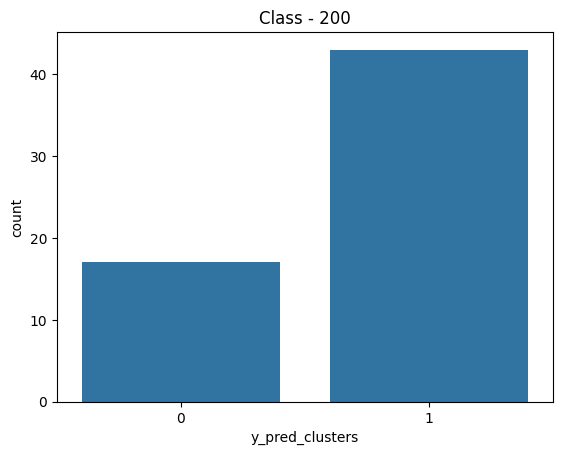

In [101]:
for i in range(1,201):
    data = df[df['class_number'] == i]
    sns.countplot(x='y_pred_clusters', data=data).set_title(f"Class - {i}")
    plt.show()

In [102]:
# Group by Class and Cluster and count the occurrences
grouped = df.groupby(['class_number', 'y_pred_clusters']).size().unstack(fill_value=0)

# Add a new column to determine the predominant cluster
grouped['finalCluster'] = (grouped[0] < grouped[1]).astype(int)

grouped

y_pred_clusters,0,1,finalCluster
class_number,,,
1,60,0,0
4,58,2,0
5,42,2,0
6,38,3,0
9,40,20,0
...,...,...,...
188,59,1,0
189,47,13,0
193,34,26,0


In [104]:
grouped['finalCluster'].value_counts()

finalCluster
0    67
1    34
Name: count, dtype: int64

In [105]:
# Save the results to a new CSV file
output_path = os.path.join('..', 'Dataset', 'Assign_cluster_cub_2.csv')  # Specify your output file path here
grouped.to_csv(output_path)

In [106]:
grouped = pd.read_csv(output_path)
print(grouped.columns, '\n')

# Filter the classes based on the predominant cluster
cluster_0_classes = grouped[grouped['finalCluster'] == 0]['class_number'].tolist()
cluster_1_classes = grouped[grouped['finalCluster'] == 1]['class_number'].tolist()

# Print the lists
print("Classes in Cluster 0: ", cluster_0_classes, "\n")
print("Classes in Cluster 1: ", cluster_1_classes)

Index(['class_number', '0', '1', 'finalCluster'], dtype='object') 

Classes in Cluster 0:  [1, 4, 5, 6, 9, 10, 13, 18, 20, 21, 22, 23, 28, 29, 30, 31, 36, 41, 44, 45, 46, 49, 50, 51, 58, 59, 60, 61, 62, 67, 68, 73, 74, 79, 80, 84, 86, 87, 88, 91, 92, 93, 100, 101, 105, 106, 110, 113, 114, 115, 116, 117, 122, 123, 135, 141, 142, 143, 151, 152, 160, 161, 167, 183, 188, 189, 193] 

Classes in Cluster 1:  [14, 15, 17, 37, 38, 39, 54, 55, 70, 76, 77, 85, 95, 96, 99, 102, 103, 104, 109, 118, 119, 120, 121, 134, 136, 139, 148, 153, 158, 162, 164, 169, 195, 200]


In [107]:
df['class_lable'] = df['class_number'].apply(lambda x: 0 if int(x) in cluster_0_classes else 1)
df

,0,1,2,3,4,5,6,7,8,9,...,4091,4092,4093,4094,4095,class_number,class_labels,image_paths,y_pred_clusters,class_lable
0,3.042403,2.884922,0.000000,7.585155,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1,Black footed Albatross,..\Dataset\CUB_KMean_Dataset\og_images\001.Bla...,0,0
1,0.000000,0.000000,9.547824,5.867018,0.000000,0.000000,0.000000,0.0,0.547732,0.614757,...,0.000000,13.213732,0.000000,0.000000,0.000000,1,Black footed Albatross,..\Dataset\CUB_KMean_Dataset\og_images\001.Bla...,0,0
2,4.043432,0.000000,0.000000,1.765985,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1,Black footed Albatross,..\Dataset\CUB_KMean_Dataset\og_images\001.Bla...,0,0
3,0.000000,0.643451,0.000000,11.106439,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,3.763441,2.361611,0.000000,0.000000,1,Black footed Albatross,..\Dataset\CUB_KMean_Dataset\og_images\001.Bla...,0,0
4,4.628635,3.541798,0.000000,2.993902,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,1.820253,0.000000,0.000000,0.000000,1,Black footed Albatross,..\Dataset\CUB_KMean_Dataset\og_images\001.Bla...,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5934,12.693314,16.853743,0.000000,10.549336,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,200,Common Yellowthroat,..\Dataset\CUB_KMean_Dataset\og_images\200.Com...,1,1
5935,0.424498,0.000000,0.000000,1.307953,0.000000,4.154796,4.755775,0.0,1.692915,0.000000,...,7.306347,5.057247,0.000000,7.918457,3.121923,200,Common Yellowthroat,..\Dataset\CUB_KMean_Dataset\og_images\200.Com...,0,1
5936,8.187036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,200,Common Yellowthroat,..\Dataset\CUB_KMean_Dataset\og_images\200.Com...,0,1
5937,14.068058,0.000000,0.000000,14.220971,3.836503,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,200,Common Yellowthroat,..\Dataset\CUB_KMean_Dataset\og_images\200.Com...,1,1


In [108]:
df['class_lable'].value_counts()

class_lable
0    3909
1    2030
Name: count, dtype: int64

# Only for even split

In [117]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
train_val_data, test_data = train_test_split(df, test_size=0.1, random_state=42, stratify=df['class_number'])
train_data, val_data = train_test_split(train_val_data, test_size=0.2, random_state=42, stratify=train_val_data['class_number'])
# train_data, val_data, test_data

In [118]:
train_data['class_number'].value_counts()

class_number
87     44
121    44
93     44
77     44
41     44
       ..
101    36
105    35
18     33
5      32
6      30
Name: count, Length: 101, dtype: int64

In [119]:
val_data['class_number'].value_counts()

class_number
44     11
61     11
76     11
99     11
45     11
       ..
84      9
151     9
5       8
18      8
6       7
Name: count, Length: 101, dtype: int64

In [120]:
test_data['class_number'].value_counts()

class_number
93     6
139    6
120    6
188    6
62     6
      ..
101    5
113    5
6      4
18     4
5      4
Name: count, Length: 101, dtype: int64

In [125]:
# path_df = train_data[['image_paths', 'class_lable']]
# path_df = val_data[['image_paths', 'class_lable']]
path_df = test_data[['image_paths', 'class_lable']]
path_df

,image_paths,class_lable
3134,..\Dataset\CUB_KMean_Dataset\og_images\093.Cla...,0
1281,..\Dataset\CUB_KMean_Dataset\og_images\039.Lea...,1
52,..\Dataset\CUB_KMean_Dataset\og_images\001.Bla...,0
882,..\Dataset\CUB_KMean_Dataset\og_images\028.Bro...,0
3094,..\Dataset\CUB_KMean_Dataset\og_images\092.Nig...,0
...,...,...
5118,..\Dataset\CUB_KMean_Dataset\og_images\153.Phi...,1
4729,..\Dataset\CUB_KMean_Dataset\og_images\139.Sca...,1
5549,..\Dataset\CUB_KMean_Dataset\og_images\169.Mag...,1
912,..\Dataset\CUB_KMean_Dataset\og_images\029.Ame...,0


In [126]:
# Base directory where folders will be created
base_dir = 'dataset'

# Iterate over each row in the DataFrame
for _, row in path_df.iterrows():
    image_path = row['image_paths']
    folder_name = row['class_lable']
    # dest_folder = os.path.join(base_dir, folder_name)
    dest_folder = os.path.join(base_dir, str(folder_name))

    # Ensure the destination folder exists
    os.makedirs(dest_folder, exist_ok=True)

    # Copy the image to the destination folder
    try:
        shutil.copy(image_path, dest_folder)
        # print(f"Copied {image_path} to {dest_folder}")
    except FileNotFoundError:
        print(f"Error: {image_path} not found")
    except Exception as e:
        print(f"Error copying {image_path} to {dest_folder}: {e}")

In [127]:
# Save the results to a new CSV file
output_path = os.path.join('..', 'Dataset', 'final_cluster_cub_dataset.csv')  # Specify your output file path here
df.to_csv(output_path, index=False)

# Real time prediction using Kmean

1. libs
2. load model (vgg16 and kmean)
3. read image 
4. preprocess inage 
5. from vgg16 feture extract from image
6. from kmean predict cluster

In [128]:
# libs

In [129]:
# Load the models (vgg16 and kmean)
vgg16_model_file_path = os.path.join('..', 'Models', 'vgg_model.pkl')
vgg16_model = load_model(vgg16_model_file_path)

kmean_model_file_path = os.path.join('..', 'Models', 'kmean_model.pkl')
kmean_model = load_model(kmean_model_file_path)


Model loaded from ..\Models\vgg_model.pkl
Model loaded from ..\Models\kmean_model.pkl


In [130]:
%%time
# Read images
display(path_df.head(2))
print('\n')

y_pred_clusters = []
# Iterate over each row in the DataFrame
for _, row in path_df.iterrows():
    image_path = row['image_paths']
    cluster_class = row['class_lable']
    
    # Load and preprocess image
    image = load_and_preprocess_image(image_path)

    # Extract features
    feature = vgg16_model.predict(image)
    
    # Convert features to numpy array
    features = np.array(feature)
    
    # Predict with the loaded model
    # y_pred_clusters = predict(kmean_model, features)
    y_pred_clusters.append(predict(kmean_model, features)[0])
#     print(y_pred_clusters)
    
#     break

,image_paths,class_lable
3134,..\Dataset\CUB_KMean_Dataset\og_images\093.Cla...,0
1281,..\Dataset\CUB_KMean_Dataset\og_images\039.Lea...,1




1/1 [==============================] - 0s 335ms/step


1/1 [==============================] - 0s 335ms/step


1/1 [==============================] - 0s 348ms/step


1/1 [==============================] - 0s 346ms/step
CPU times: total: 10min 22s
Wall time: 4min 28s


In [131]:
path_df['y_pred_clusters'] = y_pred_clusters

C:\Users\Kiran\AppData\Local\Temp\ipykernel_8480\507727973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path_df['y_pred_clusters'] = y_pred_clusters


In [132]:
path_df

,image_paths,class_lable,y_pred_clusters
3134,..\Dataset\CUB_KMean_Dataset\og_images\093.Cla...,0,1
1281,..\Dataset\CUB_KMean_Dataset\og_images\039.Lea...,1,1
52,..\Dataset\CUB_KMean_Dataset\og_images\001.Bla...,0,0
882,..\Dataset\CUB_KMean_Dataset\og_images\028.Bro...,0,0
3094,..\Dataset\CUB_KMean_Dataset\og_images\092.Nig...,0,0
...,...,...,...
5118,..\Dataset\CUB_KMean_Dataset\og_images\153.Phi...,1,0
4729,..\Dataset\CUB_KMean_Dataset\og_images\139.Sca...,1,0
5549,..\Dataset\CUB_KMean_Dataset\og_images\169.Mag...,1,1
912,..\Dataset\CUB_KMean_Dataset\og_images\029.Ame...,0,0


Accuracy: 0.7508417508417509
Loss: 0.24915824915824913
Cohen Kappa Score: 0.44097672644028996
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       390
           1       0.64      0.61      0.63       204

    accuracy                           0.75       594
   macro avg       0.72      0.72      0.72       594
weighted avg       0.75      0.75      0.75       594



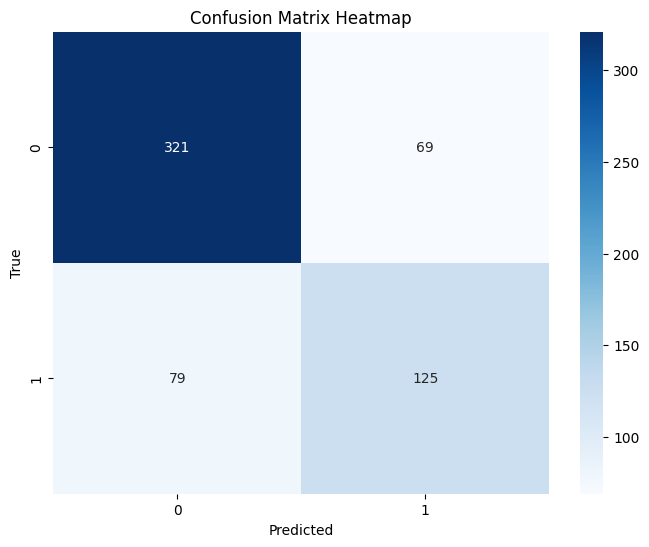

In [133]:
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

true_classes, predicted_classes = path_df['class_lable'], path_df['y_pred_clusters']

# Metrics
acc = accuracy_score(true_classes, predicted_classes)
loss = 1 - acc
cm = confusion_matrix(true_classes, predicted_classes)
cr = classification_report(true_classes, predicted_classes)
kappa = cohen_kappa_score(true_classes, predicted_classes)

print(f"Accuracy: {acc}")
print(f"Loss: {loss}")
print(f"Cohen Kappa Score: {kappa}")
print("Classification Report:")
print(cr)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            #xticklabels=true_classes ,
            #yticklabels=predicted_classes
           )
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()